In [2]:
import cdflib
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
from pathlib import Path
os.chdir(r'D:/ISRO Hackthon')

Reading AL1_ASW91_L2_BLK_20240801_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240802_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240803_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240804_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240805_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240806_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240807_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240808_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240809_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240810_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240811_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240812_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240813_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240814_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240815_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240816_UNP_9999_999999_V01.cdf
Reading AL1_ASW91_L2_BLK_20240817_UNP_9999_999999_V01.cdf
Reading AL1_AS

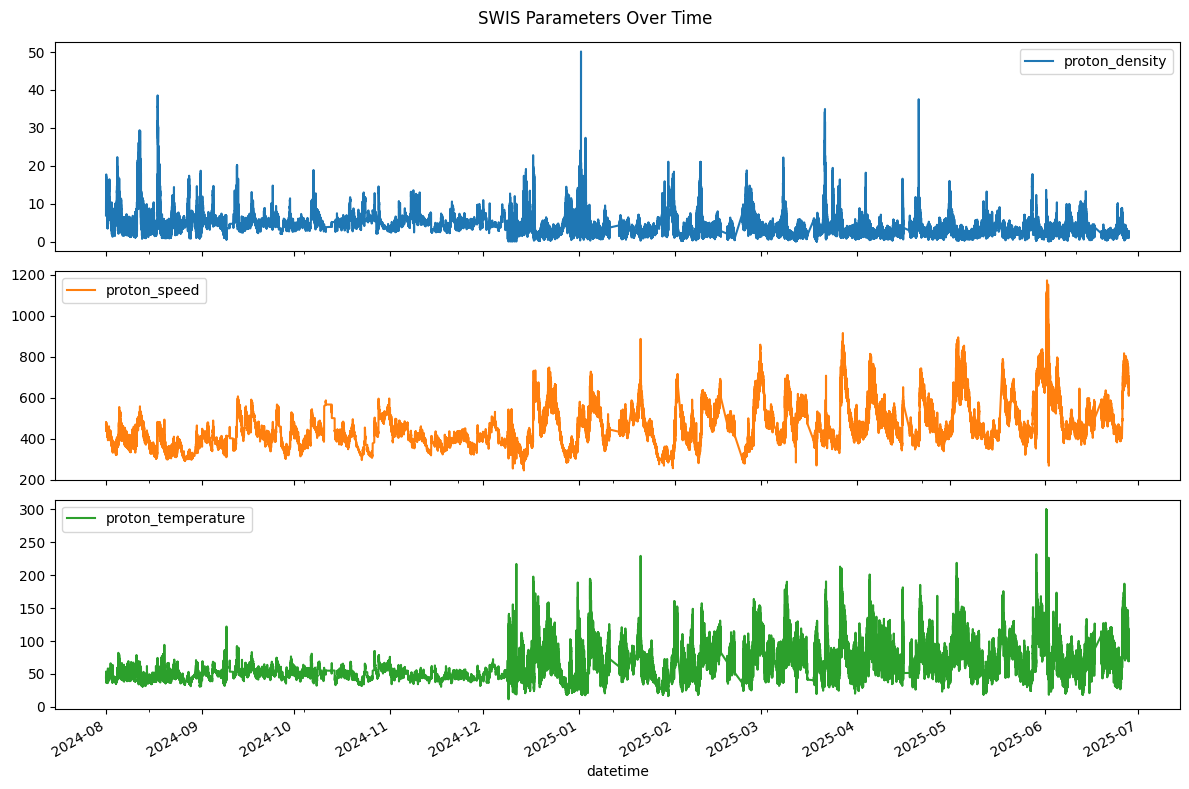

In [3]:
data_folder = Path("HaloCMEs/Data") #Creat4es a Path object pointing to the directory
all_data = []

for file_path in sorted(data_folder.glob("*.cdf")): #Iterates through every file with CDF format
    print(f"Reading {file_path.name}")
    try:
        cdf_file = cdflib.CDF(str(file_path)) 
        try:
            timestamps = cdf_file.varget('epoch_for_cdf_mod') #Newer files
        except:
            timestamps = cdf_file.varget('epoch_for_cdf') #Older files (names were different idk why)
        
        datetime_vals = cdflib.cdfepoch.to_datetime(timestamps) #Coverting the data to numpy64 format
        datetime_python = pd.to_datetime(datetime_vals) #Coverting the numpy64 format to our understanding of date and time YYMMDD
        
        proton_density = cdf_file.varget('proton_density')

        try:
            proton_speed = cdf_file.varget('proton_bulk_speed') #Newer files
        except:
            proton_speed = cdf_file.varget('proton_bulk') #Older files
        
        proton_temp = cdf_file.varget('proton_thermal')

        #Creating a data frame using the pandas library. A Data Frame is a like an excel with rows and columns
        df_day = pd.DataFrame({
            'datetime': datetime_python,
            'proton_density': proton_density,
            'proton_speed': proton_speed,
            'proton_temperature': proton_temp
        })

        df_day.replace(-1.0e+31, pd.NA, inplace = True) #Sometimes CDF files use extremely large negative numbers to represent missing values
        #The part "pd.NA" is way of marking missing data
        df_day.dropna(inplace=True) #Removes any row with atleast one missing value after you make it null using the pandas library
        all_data.append(df_day) #add the data we cleaned to our list.
    except Exception as e:
        print(f"Error Reading {file_path.name}")
df = pd.concat(all_data).sort_values('datetime')
df.set_index('datetime', inplace=True)

# Plotting
df.plot(subplots=True, figsize=(12, 8), title="SWIS Parameters Over Time")
plt.tight_layout()
plt.legend()
plt.show()

In [4]:
#This is where I have found the new and old files had different names for the variables although i don't know why
for file_path in sorted(Path("HaloCMEs/Data").glob("*.cdf")):
    print(f"\n File: {file_path.name}")
    try:
        cdf = cdflib.CDF(str(file_path)) #Open the CDF file
        variables = cdf.cdf_info().zVariables
        print("Available Variables: ")
        for v in variables:
            print(" -", v)
    except Exception as e:
        print(f"Error reading {file_path.name}: {e}")



 File: AL1_ASW91_L2_BLK_20240801_UNP_9999_999999_V01.cdf
Available Variables: 
 - epoch_for_cdf
 - proton_density
 - numden_p_uncer
 - proton_bulk
 - bulk_p_uncer
 - proton_thermal
 - thermal_p_uncer
 - spacecraft_xpos
 - spacecraft_ypos
 - spacecraft_zpos

 File: AL1_ASW91_L2_BLK_20240802_UNP_9999_999999_V01.cdf
Available Variables: 
 - epoch_for_cdf
 - proton_density
 - numden_p_uncer
 - proton_bulk
 - bulk_p_uncer
 - proton_thermal
 - thermal_p_uncer
 - spacecraft_xpos
 - spacecraft_ypos
 - spacecraft_zpos

 File: AL1_ASW91_L2_BLK_20240803_UNP_9999_999999_V01.cdf
Available Variables: 
 - epoch_for_cdf
 - proton_density
 - numden_p_uncer
 - proton_bulk
 - bulk_p_uncer
 - proton_thermal
 - thermal_p_uncer
 - spacecraft_xpos
 - spacecraft_ypos
 - spacecraft_zpos

 File: AL1_ASW91_L2_BLK_20240804_UNP_9999_999999_V01.cdf
Available Variables: 
 - epoch_for_cdf
 - proton_density
 - numden_p_uncer
 - proton_bulk
 - bulk_p_uncer
 - proton_thermal
 - thermal_p_uncer
 - spacecraft_xpos
 - spa

In [7]:
# Reading the SOHO data files to identify Halo CMEs
halo_cme_times = []  # We'll collect timestamps of Halo CMEs to match them with Aditya-L1 observations

soho_folder = Path("HaloCMEs/SOHOData")  # Path to the folder containing SOHO CME text data
for file_path in sorted(soho_folder.glob("*.txt")):  # Loop through all .txt files in sorted order
    print(f"📄 Parsing {file_path.name}")
    with open(file_path, "r") as file:  # Open each file for reading
        for line in file:
            # Check for lines that start with a year (i.e., data entries from 2024 or 2025)
            if line.strip().startswith("2024") or line.strip().startswith("2025"):
                try:
                    date_str = line[0:10].strip()      # Extract date in YYYY/MM/DD format
                    time_str = line[11:19].strip()     # Extract time in HH:MM:SS format
                    pa = line[20:28].strip()           # Extract Central Position Angle (or 'Halo')
                    width = line[29:36].strip()        # Extract Angular Width

                    # Check if the event is a full Halo CME
                    if "Halo" in pa and width == "360":
                        # Combine date and time into a datetime object
                        dt = datetime.strptime(f"{date_str} {time_str}", "%Y/%m/%d %H:%M:%S")
                        halo_cme_times.append(dt)  # Store the timestamp
                except Exception as e:
                    # Log the line that caused an error
                    print(f"❌ Failed on line: {line.strip()} ({e})")

# Remove duplicates and sort all detected CME times chronologically
halo_cme_times = sorted(set(halo_cme_times))

# Display results
print(f"\n✅ Total Halo CMEs detected: {len(halo_cme_times)}")
for t in halo_cme_times[:5]:  # Preview the first few entries
    print("  →", t)


📄 Parsing univ2024_01.txt
📄 Parsing univ2024_02.txt
📄 Parsing univ2024_03.txt
📄 Parsing univ2024_04.txt
📄 Parsing univ2024_05.txt
📄 Parsing univ2024_06.txt
📄 Parsing univ2024_07.txt
📄 Parsing univ2024_08.txt
📄 Parsing univ2024_09.txt
📄 Parsing univ2024_10.txt
📄 Parsing univ2024_11.txt
📄 Parsing univ2024_12.txt
📄 Parsing univ2025_01.txt
📄 Parsing univ2025_02.txt
📄 Parsing univ2025_03.txt

✅ Total Halo CMEs detected: 110
  → 2024-01-02 11:12:00
  → 2024-01-04 00:00:00
  → 2024-01-20 06:24:00
  → 2024-01-20 09:12:00
  → 2024-01-21 00:24:00


In [ ]:
#Filter CME Events within our data range
df_start = df.index.min()
df_end = df.index.max()

matching_cmes = [
    t for t in halo_cme_times
    if (df_start - timedelta(hours=6)) <= t <= (df_end + timedelta(hours=6))
]

print(f"Total Halo CMEs matched with SWIS Data: {len(matching_cmes)}")
print("Sample matches: ")
for t in matching_cmes[:5]:
    print(" ->", t)

Total Halo CMEs matched with SWIS Data: 43
Sample matches: 
 -> 2024-07-31 18:36:00
 -> 2024-08-01 07:24:00
 -> 2024-08-05 13:48:00
 -> 2024-08-07 02:12:00
 -> 2024-08-07 14:12:00


CME 1: 2024-07-31 18:36:00 | Points: 144


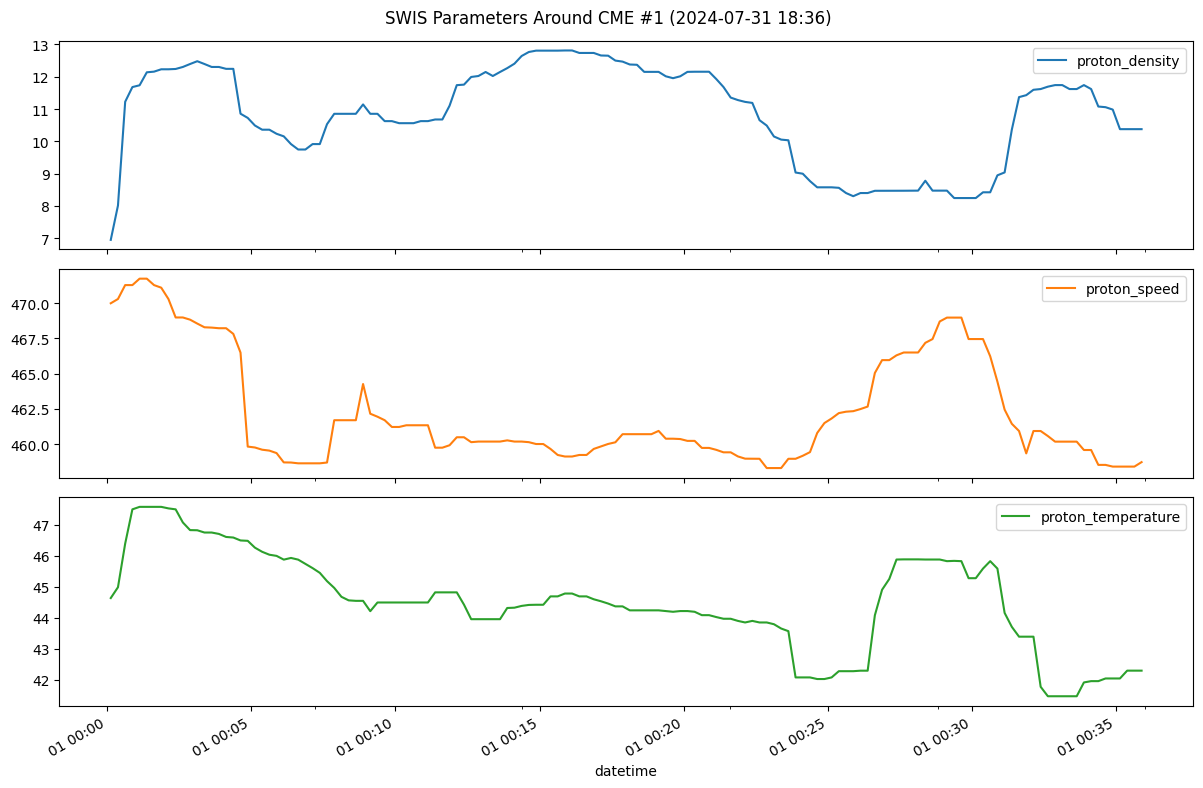

CME 2: 2024-08-01 07:24:00 | Points: 2833


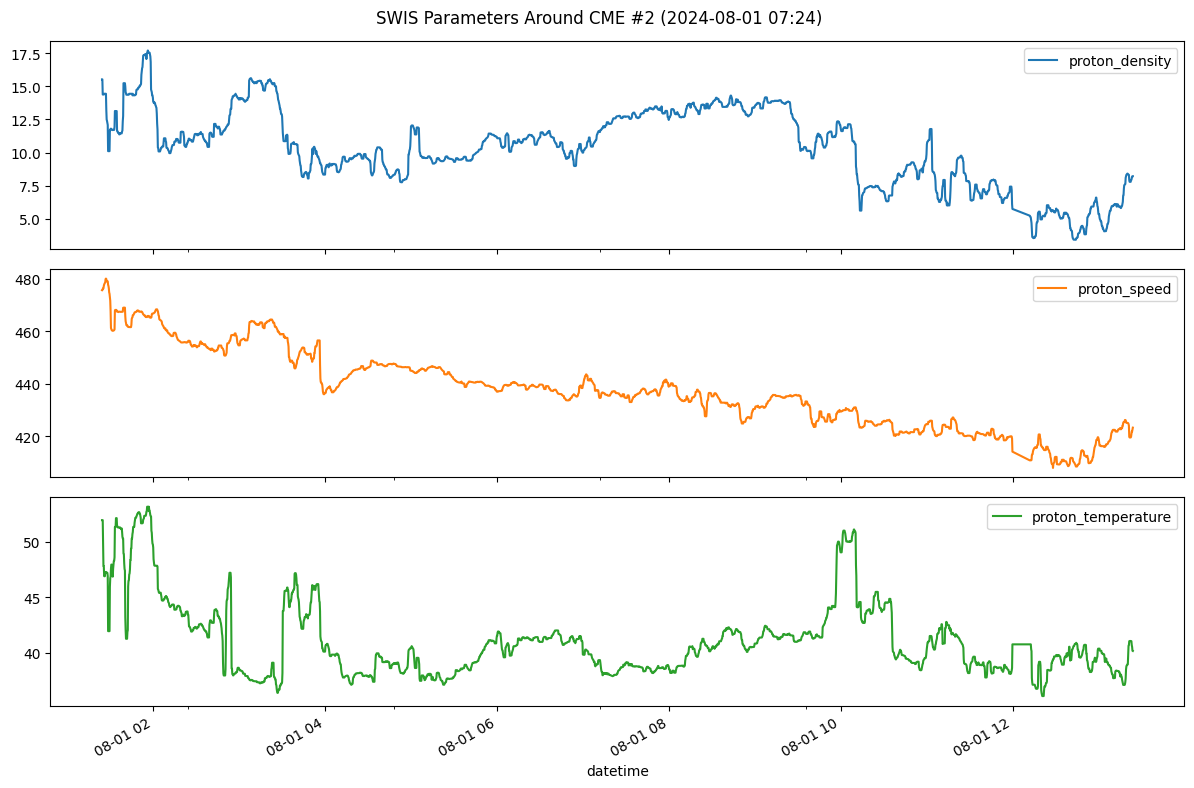

CME 3: 2024-08-05 13:48:00 | Points: 2880


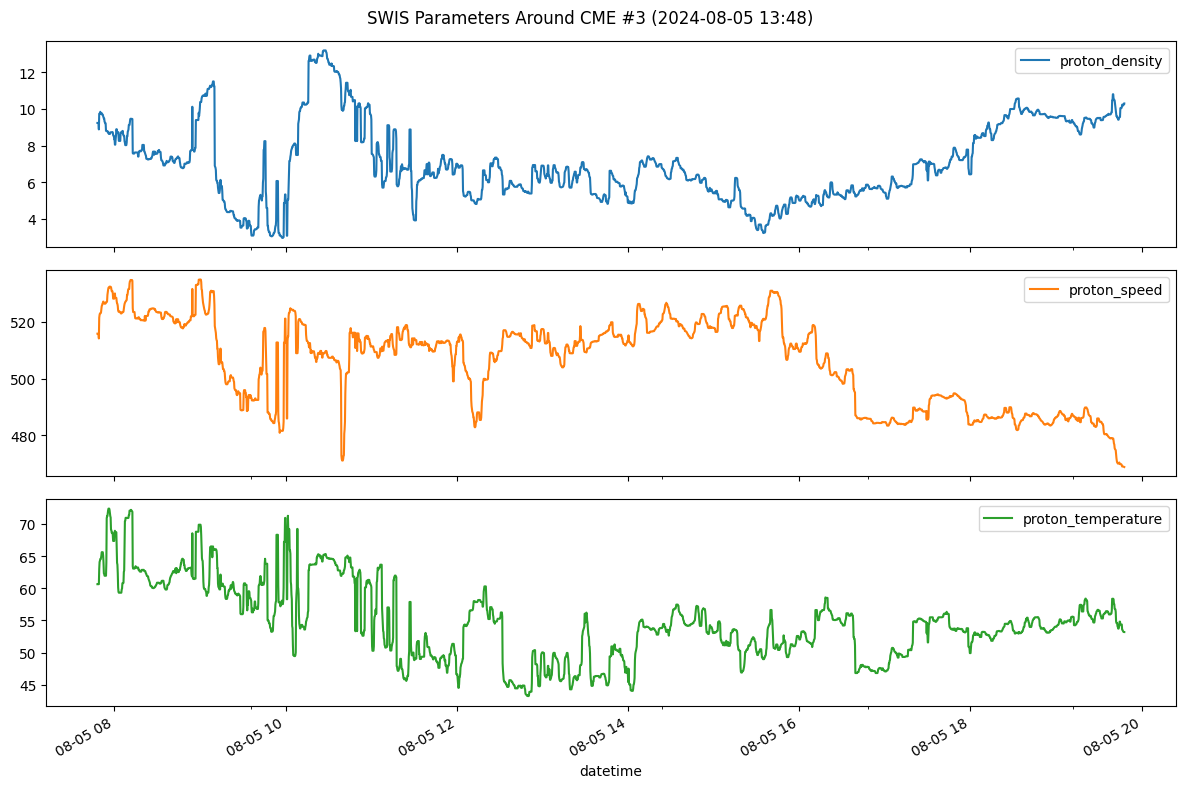

CME 4: 2024-08-07 02:12:00 | Points: 2878


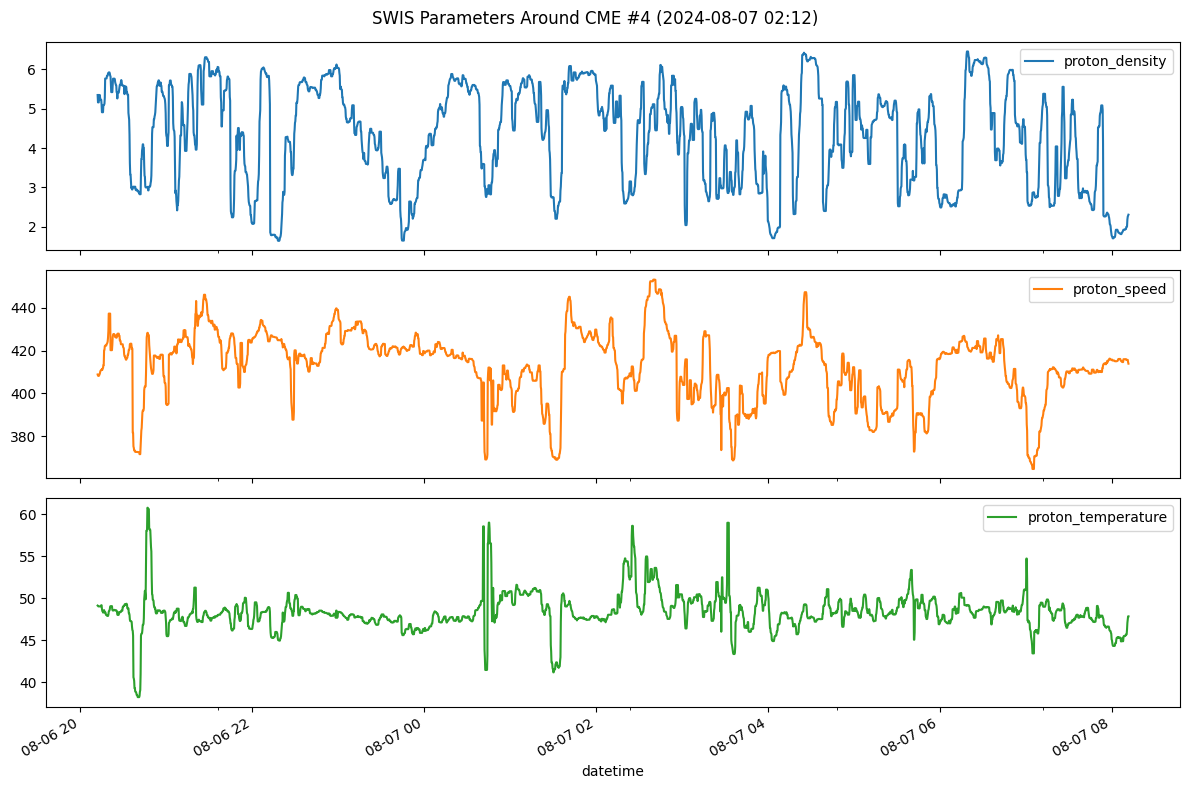

CME 5: 2024-08-07 14:12:00 | Points: 2880


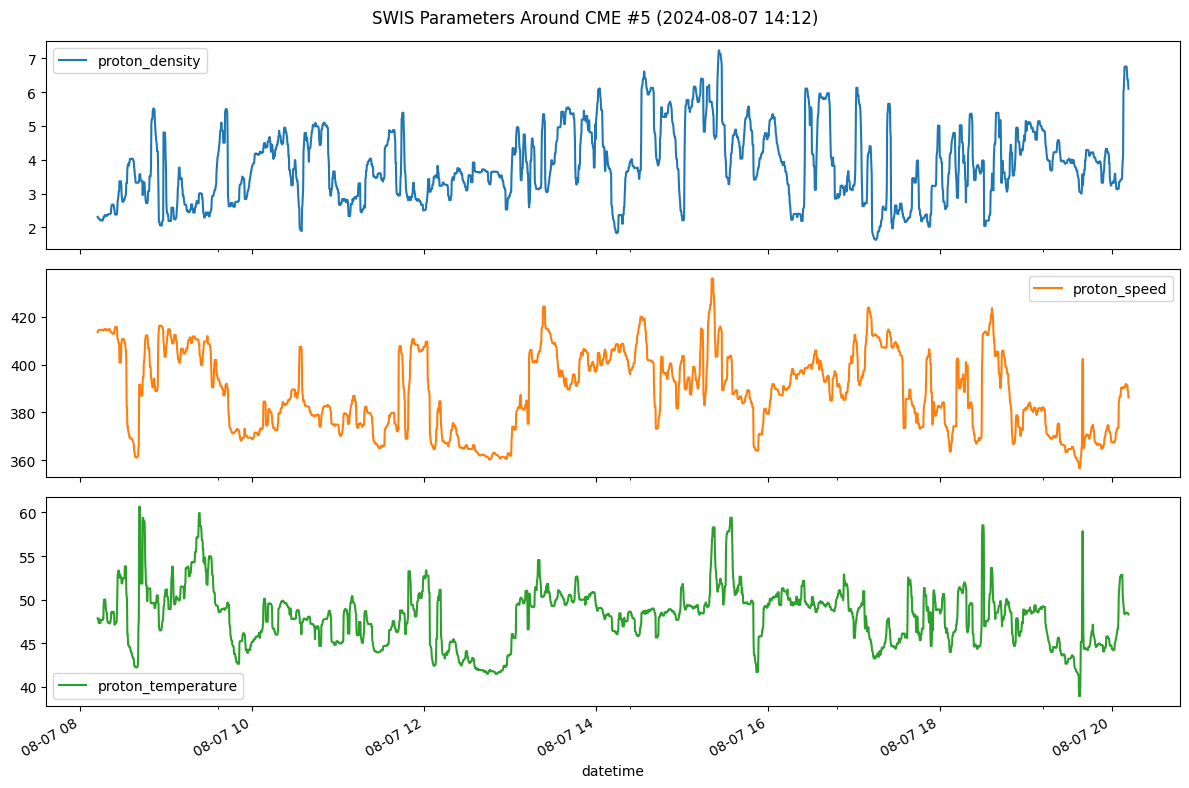

In [ ]:
#Plotting SWIS Parameters Around Each Matched Halo CME
num_to_plot = 5
for i, cme_time in enumerate(matching_cmes[:num_to_plot]):
    start_time = cme_time - timedelta(hours=6)
    end_time = cme_time + timedelta(hours=6)

    window_df = df[(df.index >= start_time) & (df.index <= end_time)]

    if window_df.empty:
        print(f"No Data found for CME {i + 1} at {cme_time}")
        continue
    
    print(f"CME {i + 1}: {cme_time} | Points: {len(window_df)}")

    window_df.plot(
        subplots = True,
        figsize = (12, 8),
        title=f"SWIS Parameters Around CME #{i+1} ({cme_time.strftime('%Y-%m-%d %H:%M')})",
        sharex=True
    )
    plt.tight_layout()
    plt.show()

    #Found out that time wasn't matching since the instruments are far away and should be taken into consideration
    

In [ ]:
#Adjusting the time intervals and we found 10 so maybe we might be right
adjusted_cme_arrivals = []

for file_path in sorted(Path("HaloCMEs/SOHOData").glob("*.txt")):
    print(f"📄 Parsing {file_path.name}")
    with open(file_path, "r") as file:
        for line in file:
            if line.strip().startswith("2024") or line.strip().startswith("2025"):
                try:
                    date_str = line[0:10].strip()
                    time_str = line[11:19].strip()
                    pa = line[20:28].strip()
                    width = line[29:36].strip()
                    speed_str = line[37:45].strip()  # Linear Speed column

                    if "Halo" in pa and width == "360" and speed_str.isdigit():
                        speed = int(speed_str)
                        cme_time = datetime.strptime(f"{date_str} {time_str}", "%Y/%m/%d %H:%M:%S")
                        travel_time_hr = (1.5e8) / (speed * 3600)  # time in hours
                        arrival_time = cme_time + timedelta(hours=travel_time_hr)
                        adjusted_cme_arrivals.append(arrival_time)

                except Exception as e:
                    print(f"❌ Failed to parse line: {line.strip()} ({e})")

adjusted_cme_arrivals = sorted(set(adjusted_cme_arrivals))
print(f"\n🚀 Adjusted CME arrivals at L1: {len(adjusted_cme_arrivals)}")
for t in adjusted_cme_arrivals[:5]:
    print("  →", t)


📄 Parsing univ2024_01.txt
📄 Parsing univ2024_02.txt
📄 Parsing univ2024_03.txt
📄 Parsing univ2024_04.txt
📄 Parsing univ2024_05.txt
📄 Parsing univ2024_06.txt
📄 Parsing univ2024_07.txt
📄 Parsing univ2024_08.txt
📄 Parsing univ2024_09.txt
📄 Parsing univ2024_10.txt
📄 Parsing univ2024_11.txt
📄 Parsing univ2024_12.txt
📄 Parsing univ2025_01.txt
📄 Parsing univ2025_02.txt
📄 Parsing univ2025_03.txt

🚀 Adjusted CME arrivals at L1: 110
  → 2024-01-05 12:41:10.264550
  → 2024-01-07 18:22:59.609544
  → 2024-01-22 10:13:10.588235
  → 2024-01-22 21:47:18.692810
  → 2024-01-24 19:06:22.702703


⚠️ No SWIS data for adjusted CME 1 at 2024-01-05 12:41:10.264550
⚠️ No SWIS data for adjusted CME 2 at 2024-01-07 18:22:59.609544
⚠️ No SWIS data for adjusted CME 3 at 2024-01-22 10:13:10.588235
⚠️ No SWIS data for adjusted CME 4 at 2024-01-22 21:47:18.692810
⚠️ No SWIS data for adjusted CME 5 at 2024-01-24 19:06:22.702703
⚠️ No SWIS data for adjusted CME 6 at 2024-01-25 20:22:35.112540
⚠️ No SWIS data for adjusted CME 7 at 2024-01-30 07:12:45.096525
⚠️ No SWIS data for adjusted CME 8 at 2024-01-31 17:46:07.531381
⚠️ No SWIS data for adjusted CME 9 at 2024-02-02 14:21:41.806907
⚠️ No SWIS data for adjusted CME 10 at 2024-02-03 17:40:13.333333
⚠️ No SWIS data for adjusted CME 11 at 2024-02-08 06:19:01.224490
⚠️ No SWIS data for adjusted CME 12 at 2024-02-08 08:05:45.785124
⚠️ No SWIS data for adjusted CME 13 at 2024-02-10 04:23:43.044572
⚠️ No SWIS data for adjusted CME 14 at 2024-02-11 09:11:02.792666
⚠️ No SWIS data for adjusted CME 15 at 2024-02-12 21:31:24.928367
⚠️ No SWIS data for

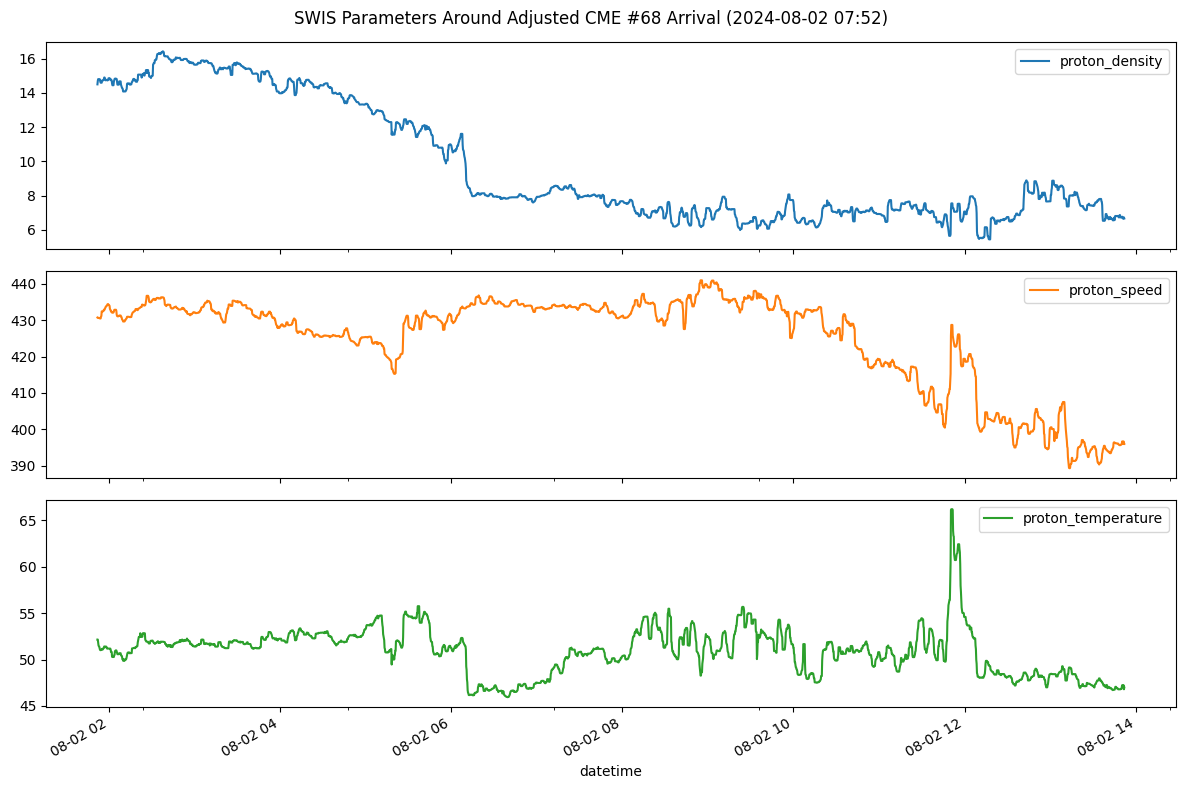

🛰️ Adjusted CME 69: 2024-08-03 00:05:24.375000 | Points: 2879


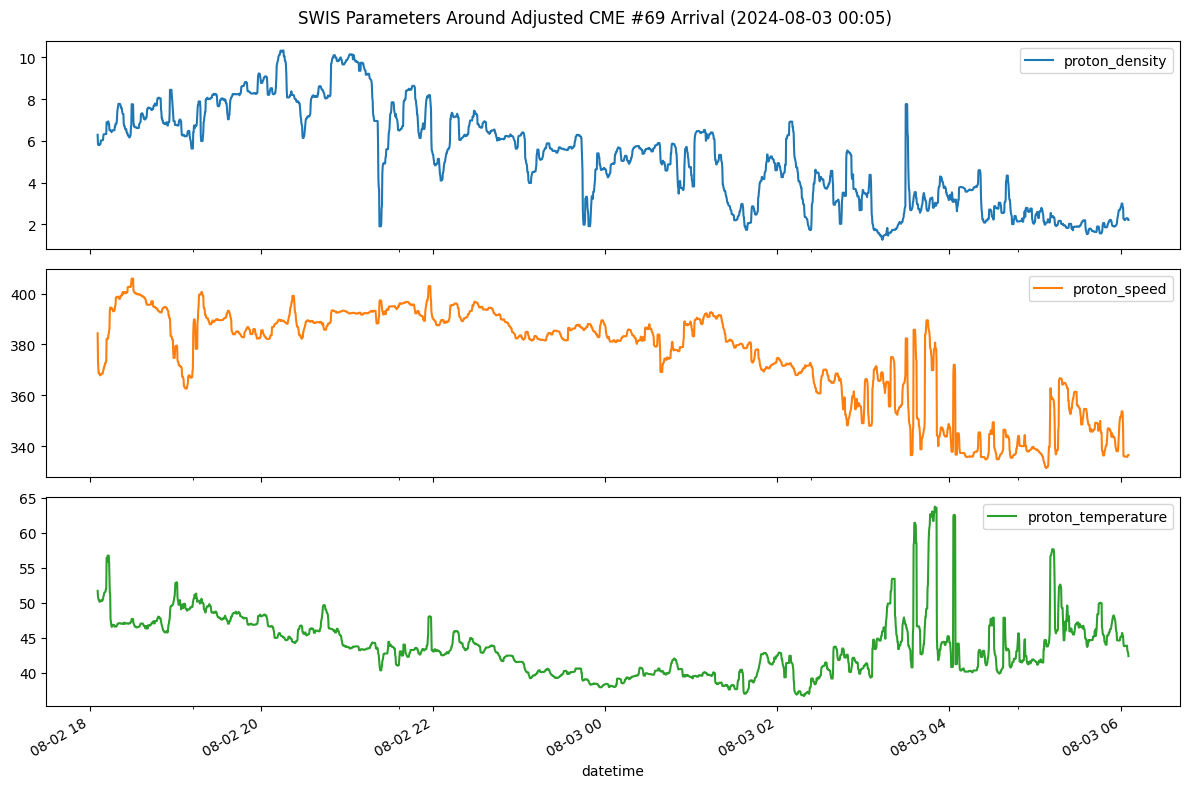

🛰️ Adjusted CME 70: 2024-08-07 01:52:30.129870 | Points: 2878


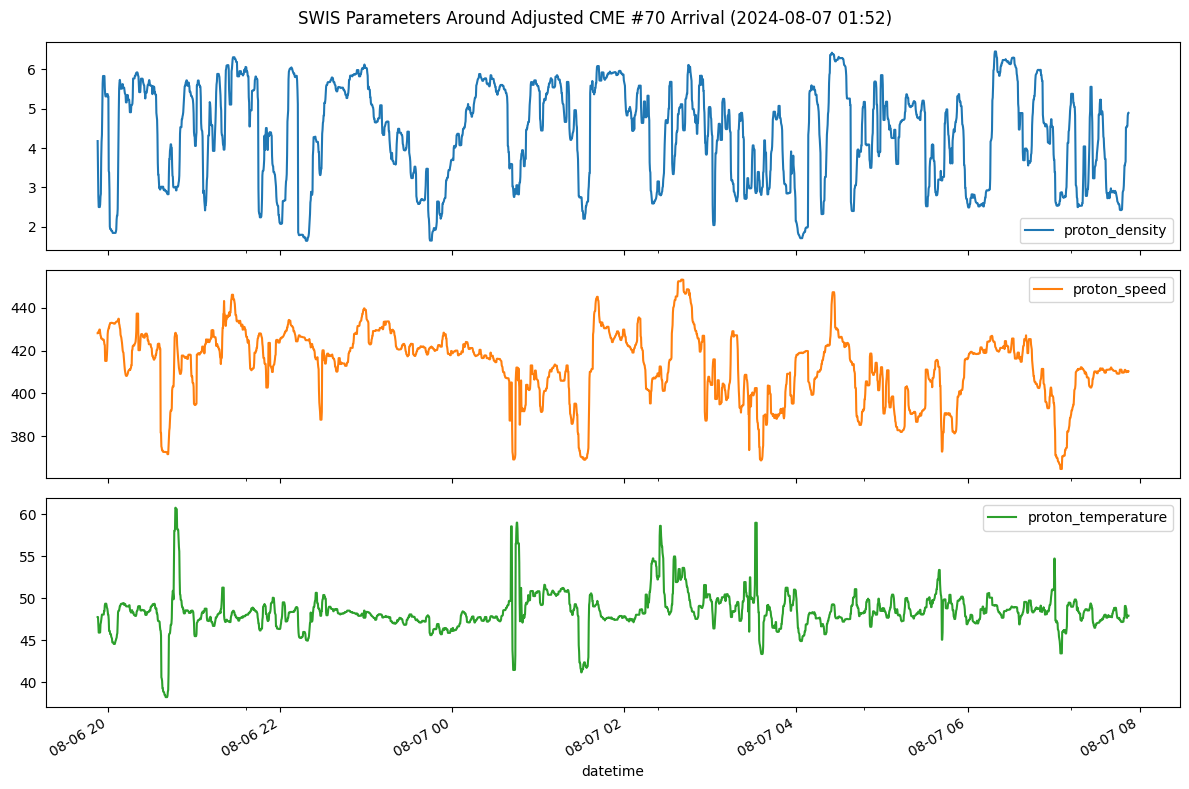

🛰️ Adjusted CME 71: 2024-08-10 05:31:23.525836 | Points: 2878


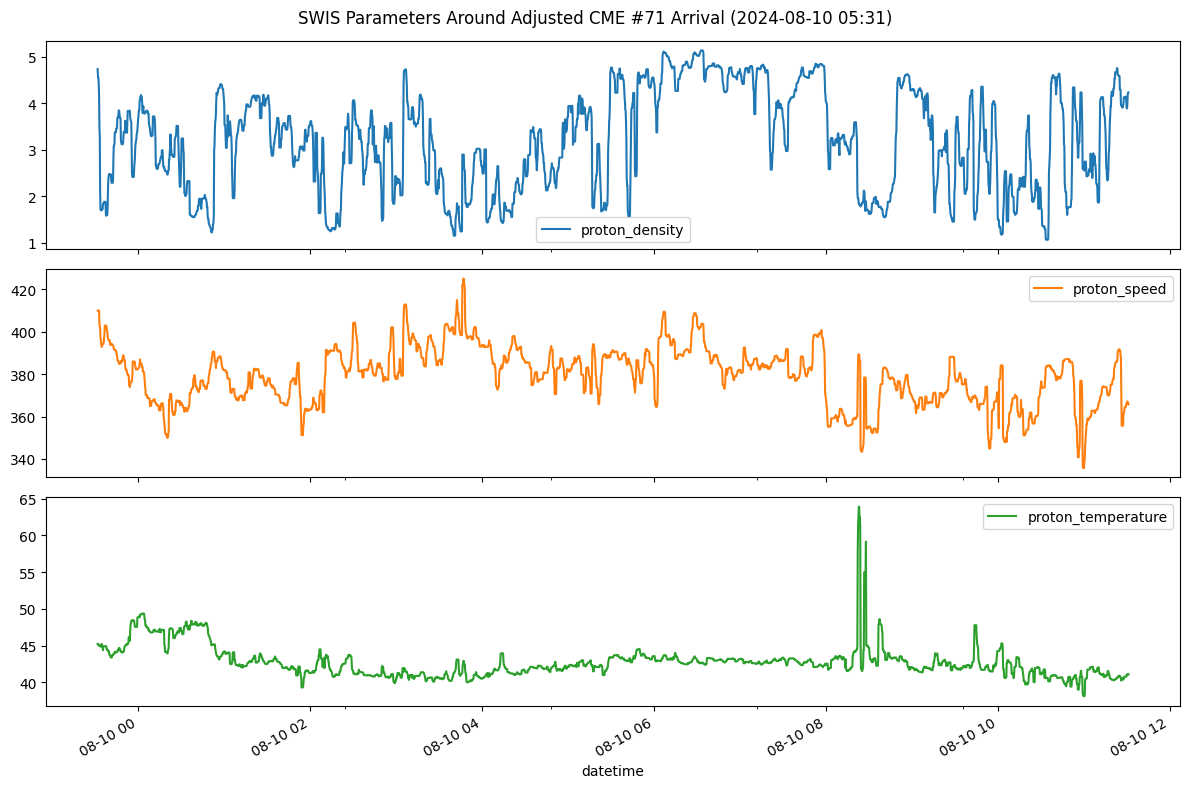

🛰️ Adjusted CME 72: 2024-08-11 00:36:34.068441 | Points: 2879


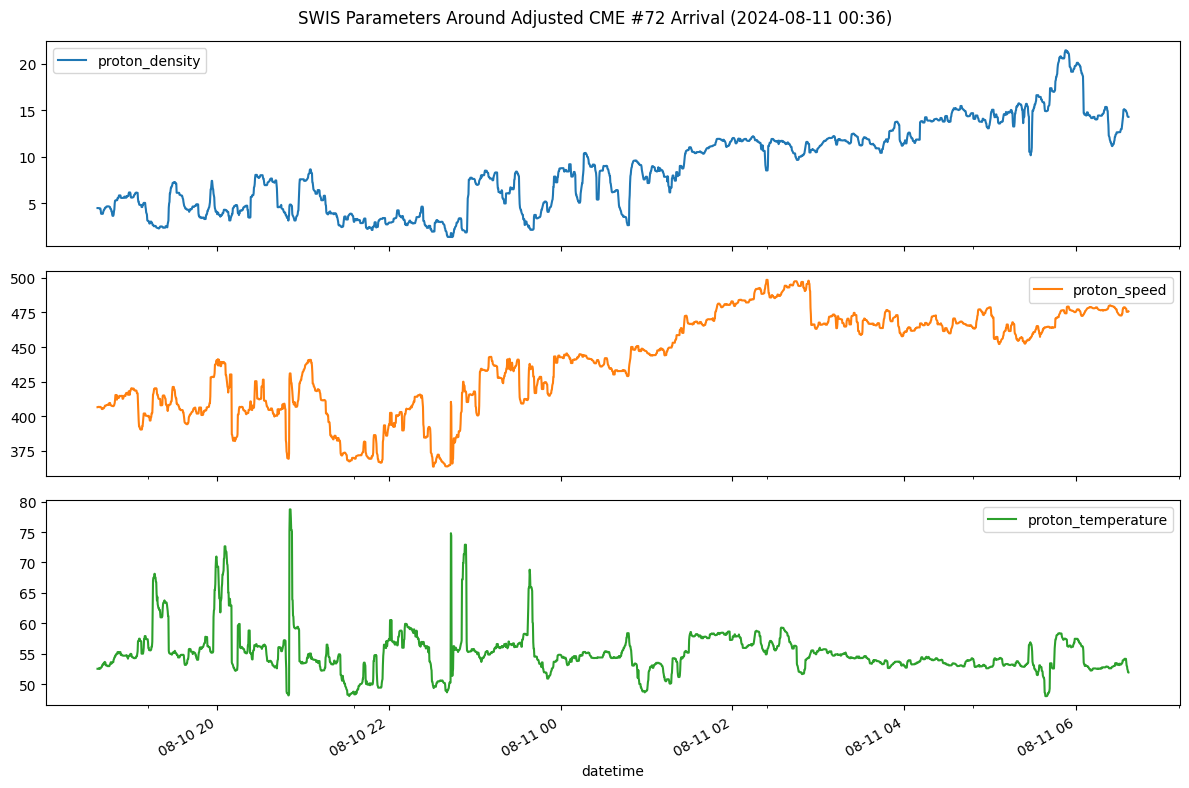

🛰️ Adjusted CME 73: 2024-08-11 02:06:50.909091 | Points: 2879


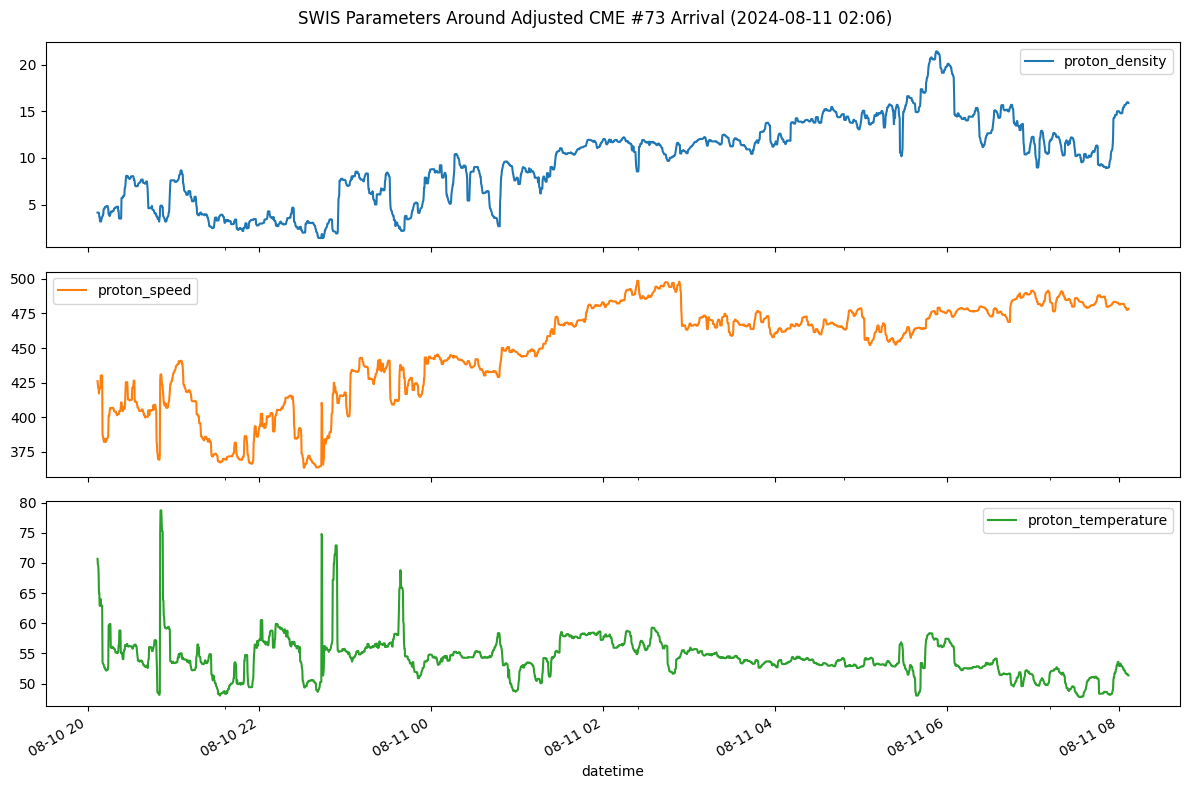

🛰️ Adjusted CME 74: 2024-08-11 03:05:57.209302 | Points: 2878


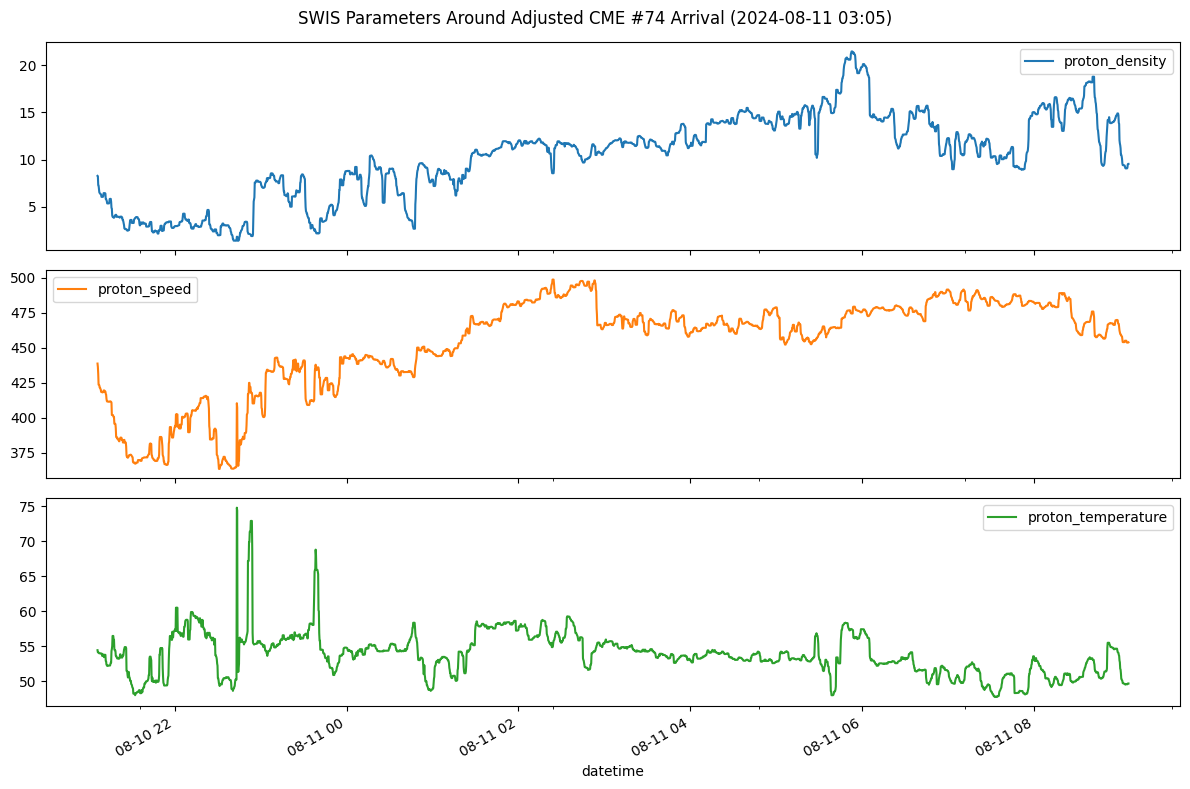

🛰️ Adjusted CME 75: 2024-08-12 14:54:29.717868 | Points: 2798


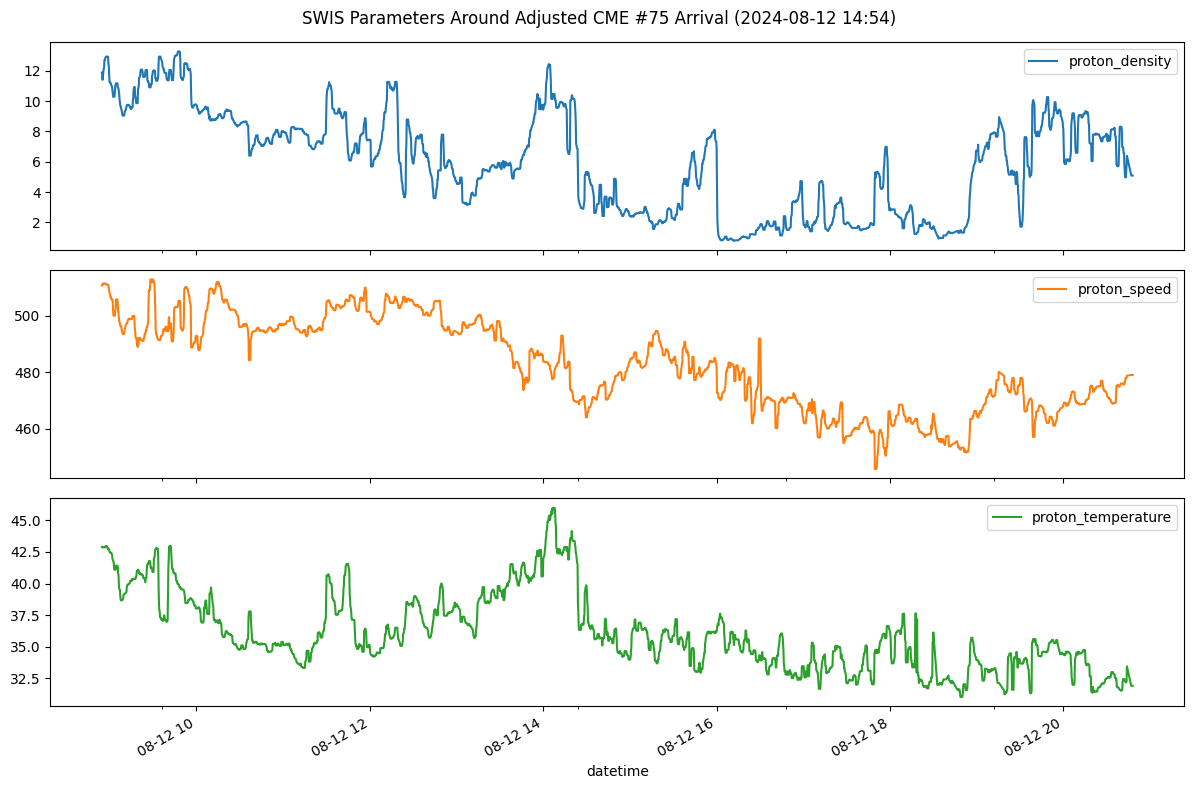

🛰️ Adjusted CME 76: 2024-08-13 18:55:10.473684 | Points: 2661


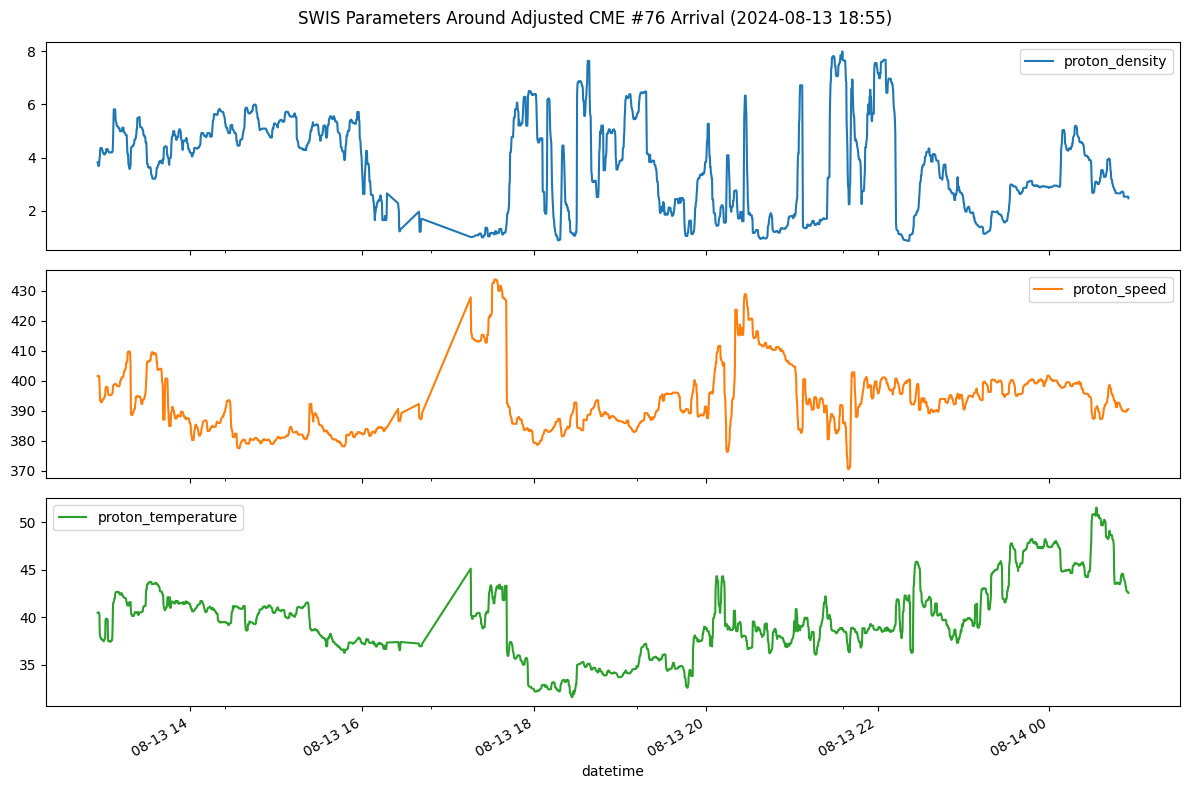

🛰️ Adjusted CME 77: 2024-08-15 03:52:00 | Points: 2878


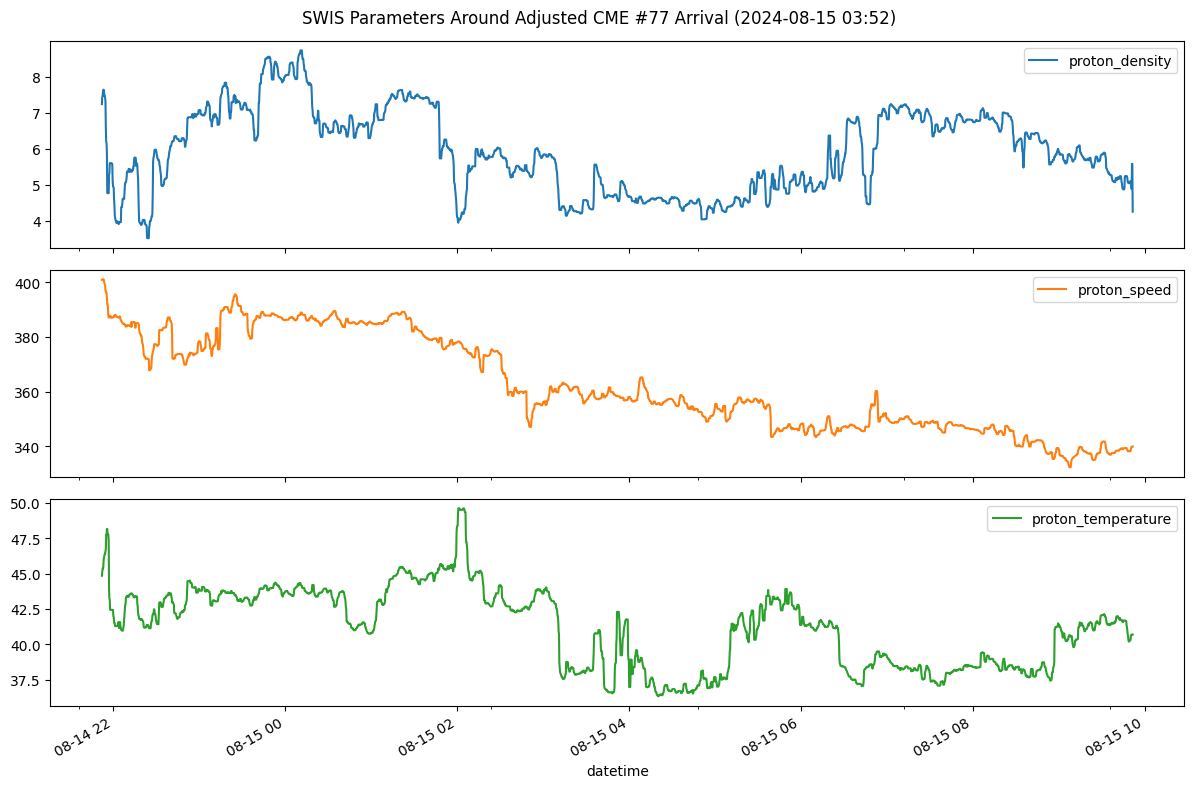

🛰️ Adjusted CME 78: 2024-08-17 09:29:57.894737 | Points: 2870


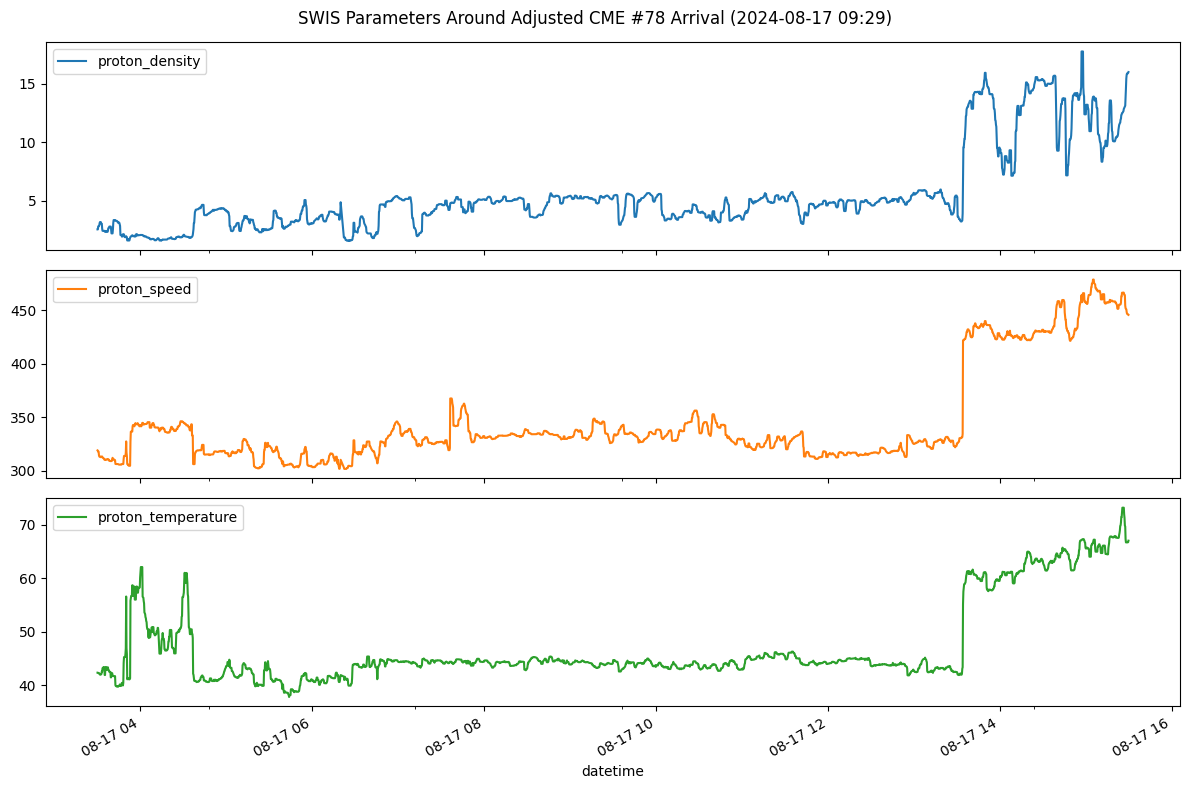

🛰️ Adjusted CME 79: 2024-08-25 09:45:16.238095 | Points: 2880


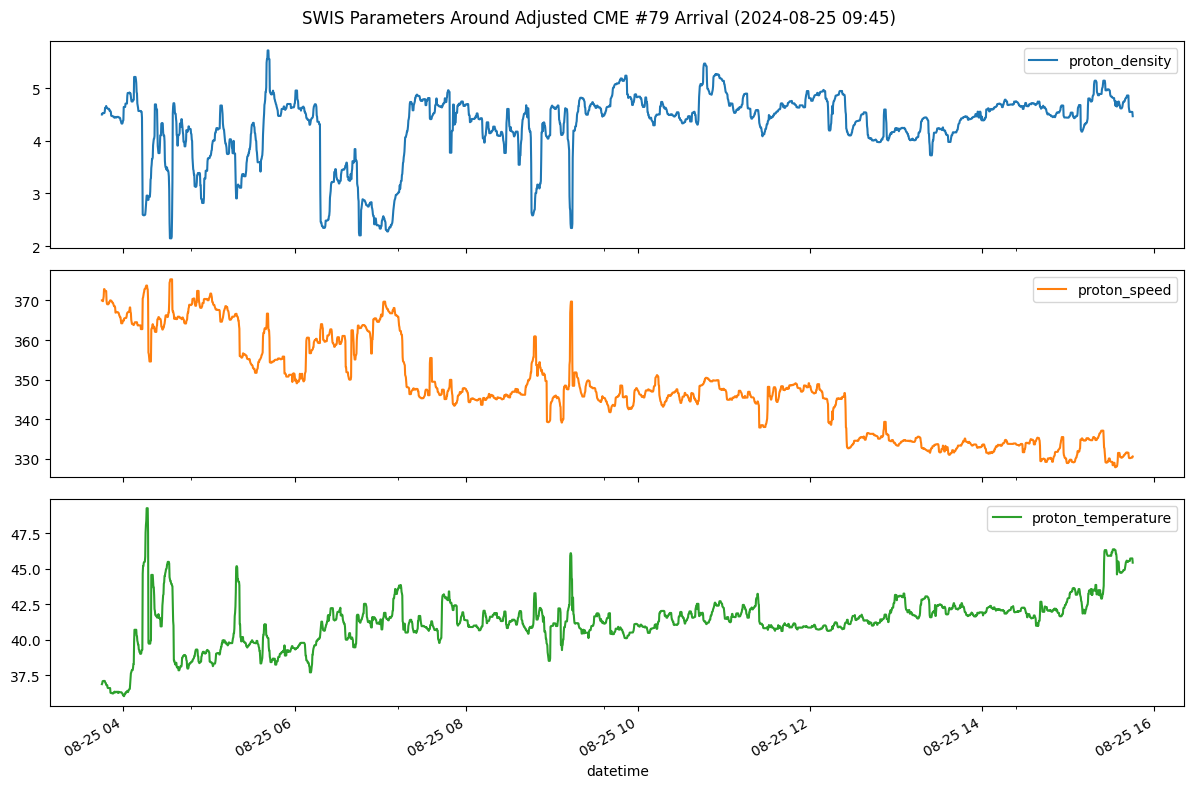

🛰️ Adjusted CME 80: 2024-09-02 18:10:16.944243 | Points: 2838


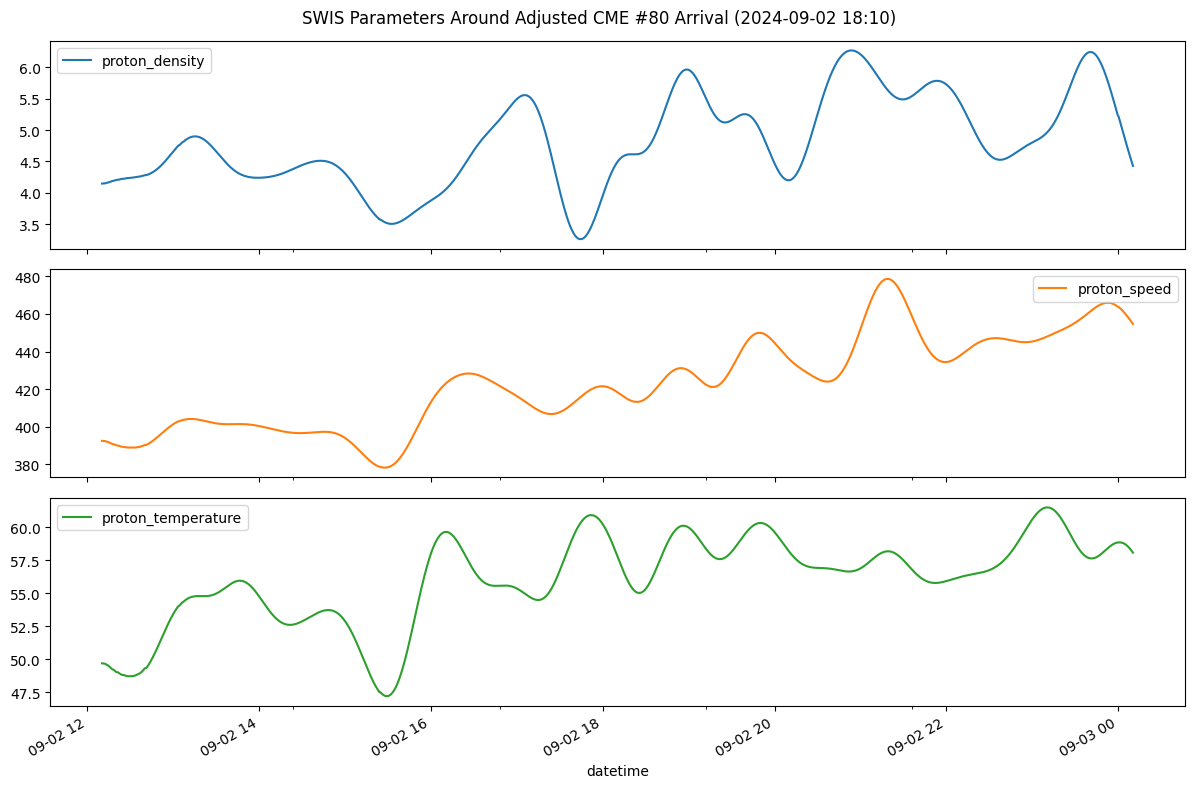

🛰️ Adjusted CME 81: 2024-09-04 16:56:17.075099 | Points: 2880


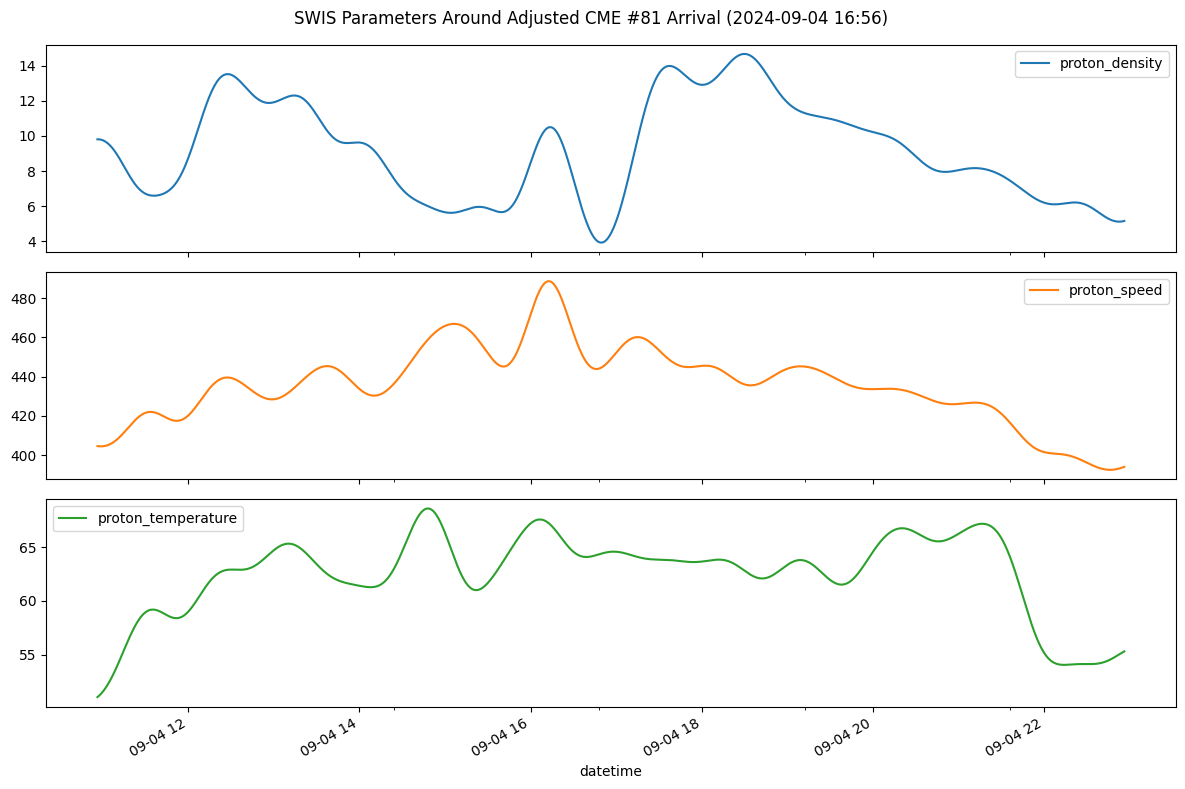

🛰️ Adjusted CME 82: 2024-09-06 15:42:19.403454 | Points: 2880


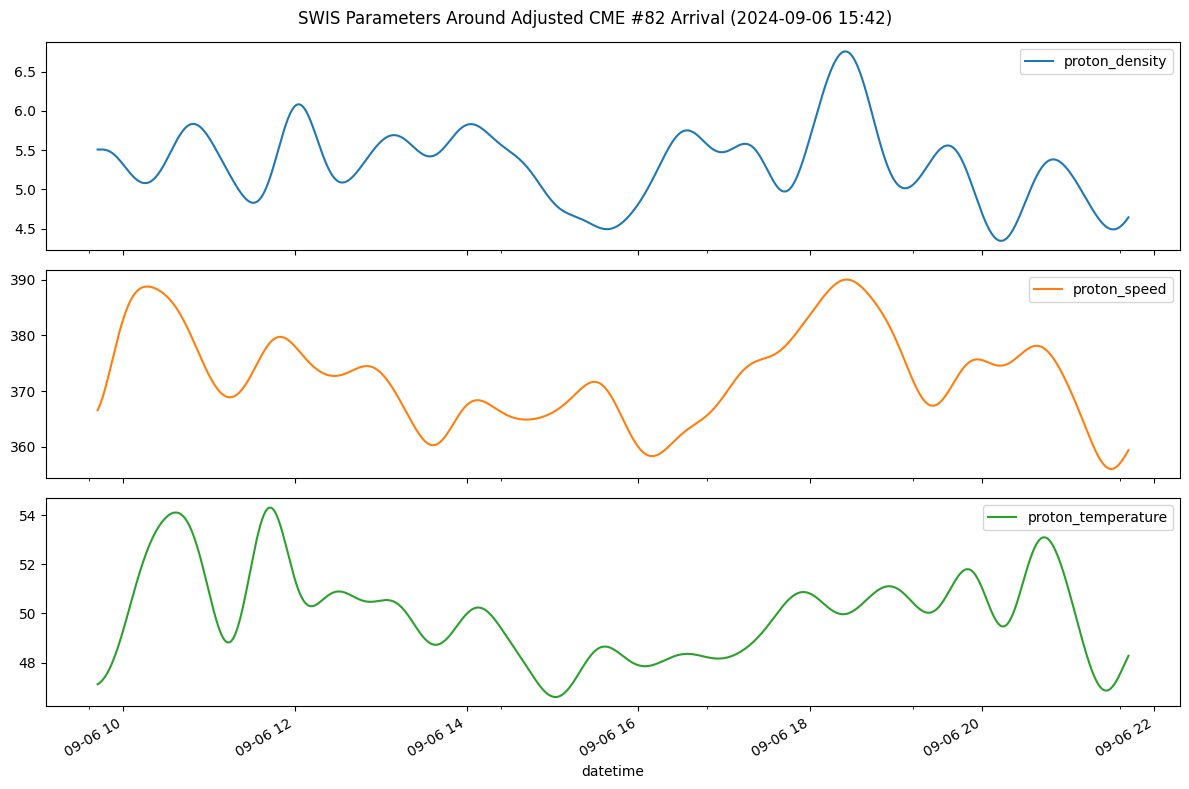

⚠️ No SWIS data for adjusted CME 83 at 2024-09-10 08:46:34.533509
🛰️ Adjusted CME 84: 2024-09-12 17:12:01.493002 | Points: 2825


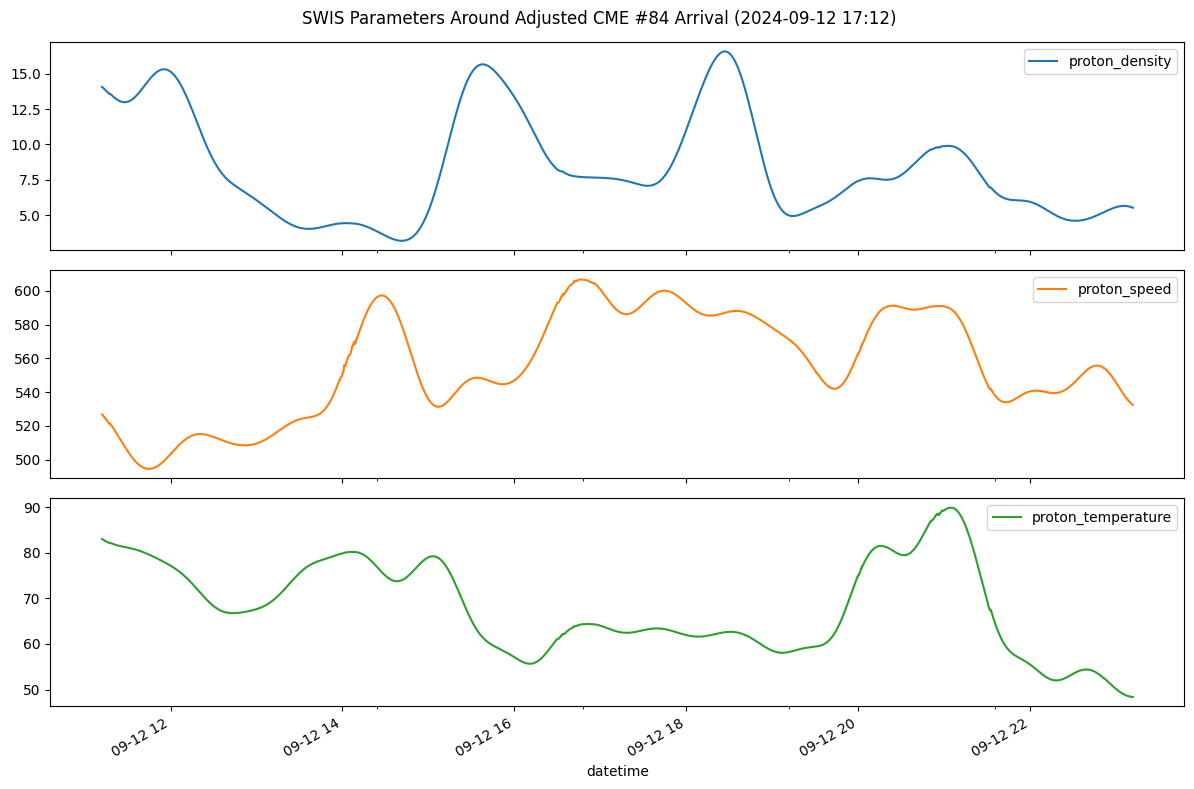

🛰️ Adjusted CME 85: 2024-09-15 09:12:38.140321 | Points: 2878


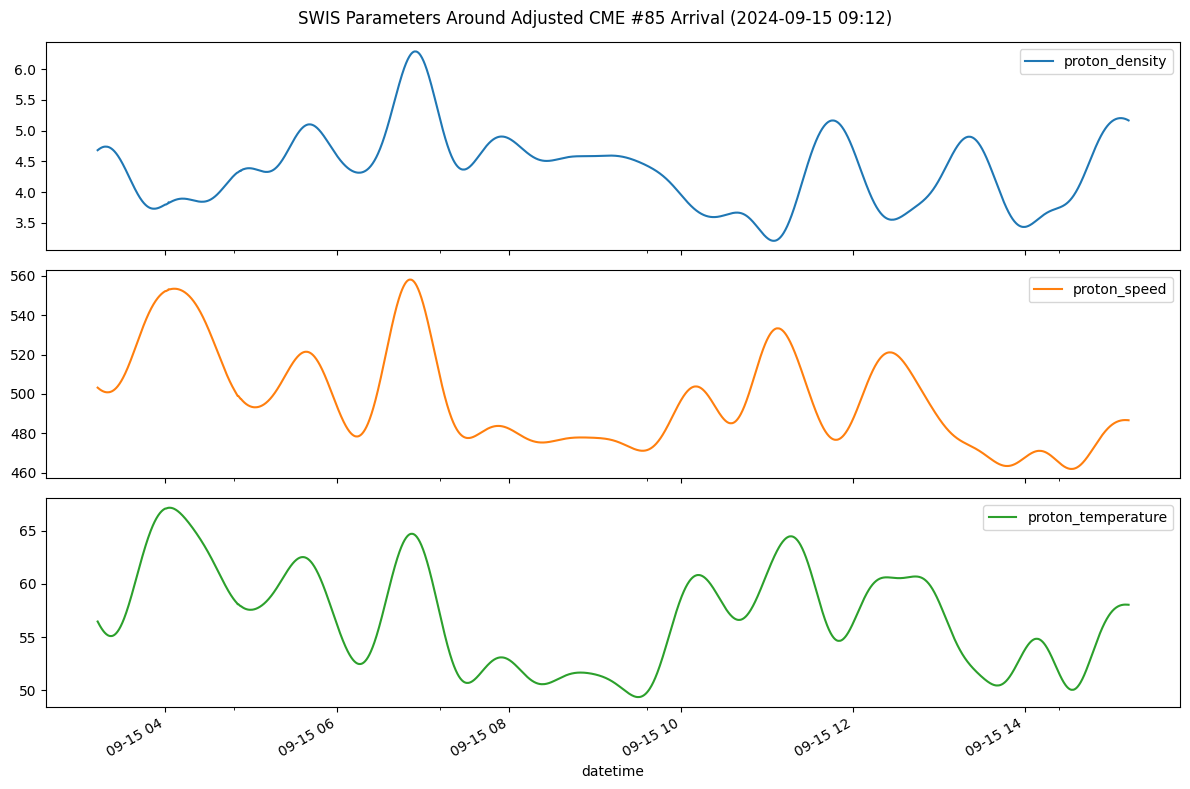

🛰️ Adjusted CME 86: 2024-09-24 06:46:26.751592 | Points: 185


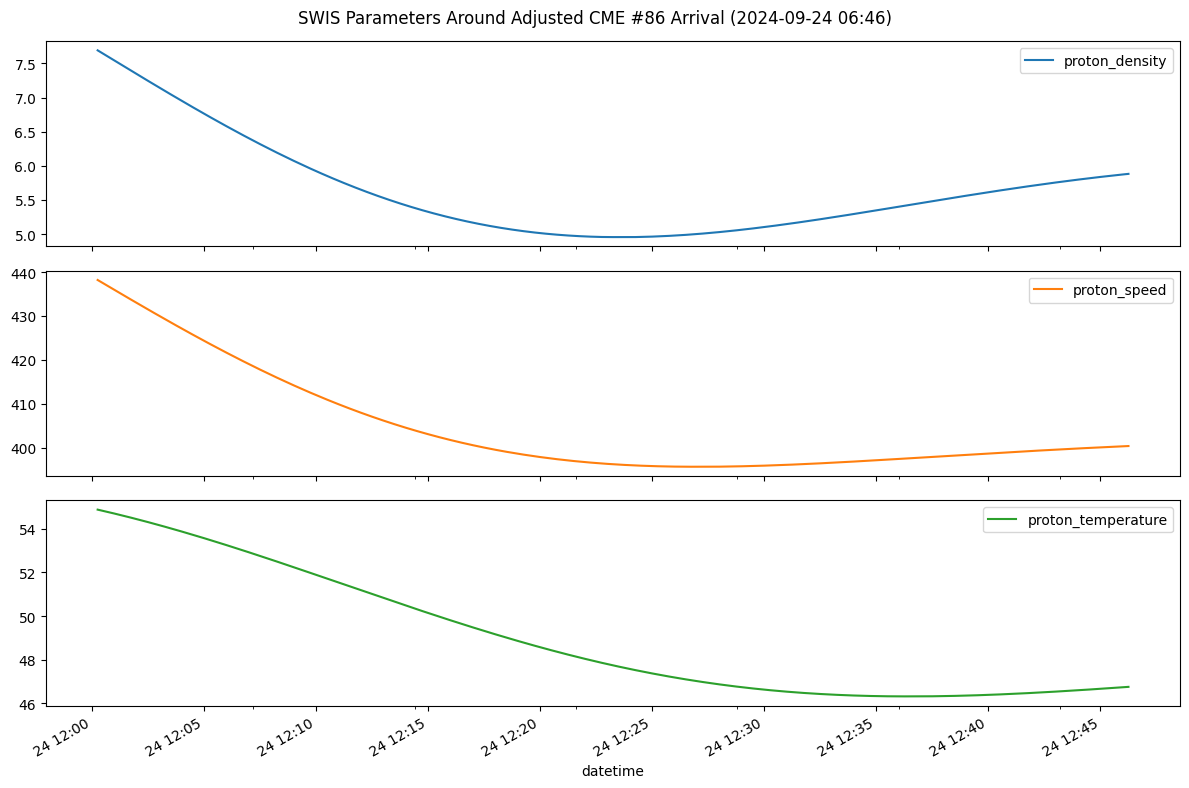

🛰️ Adjusted CME 87: 2024-10-04 20:16:36.120401 | Points: 2879


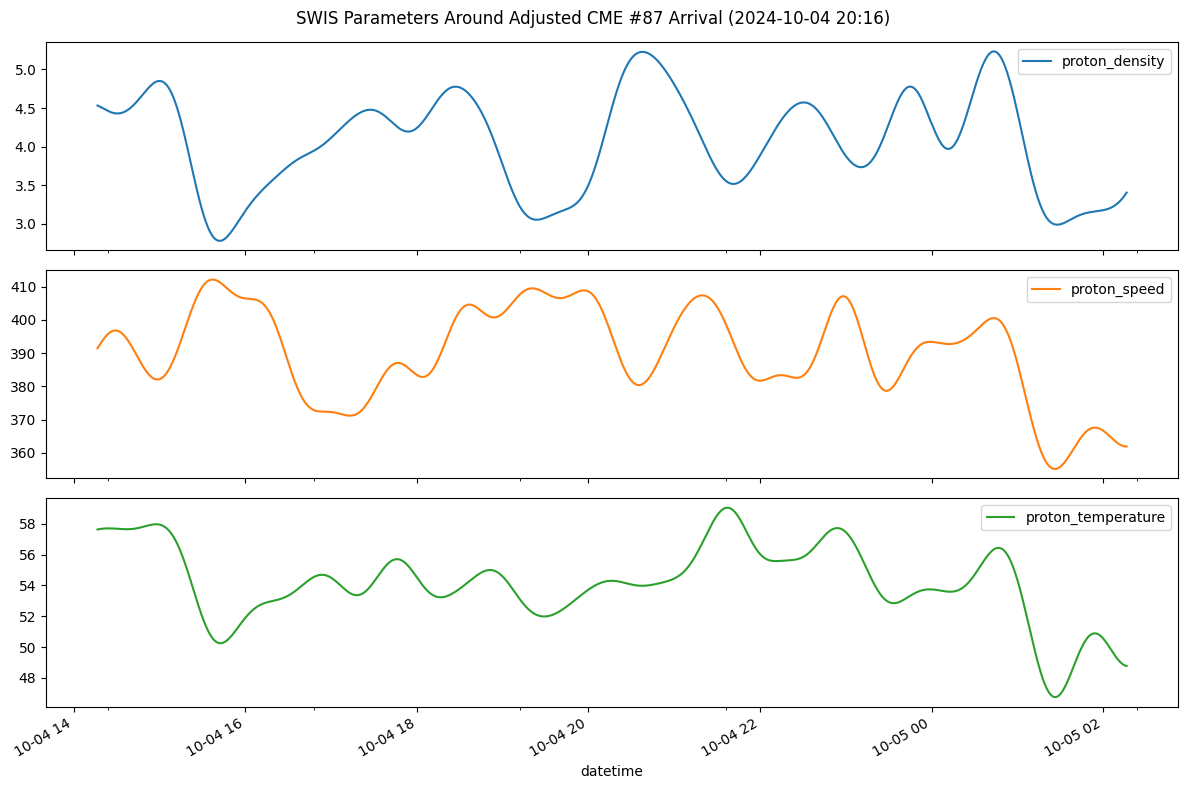

🛰️ Adjusted CME 88: 2024-10-05 15:33:04.019488 | Points: 2873


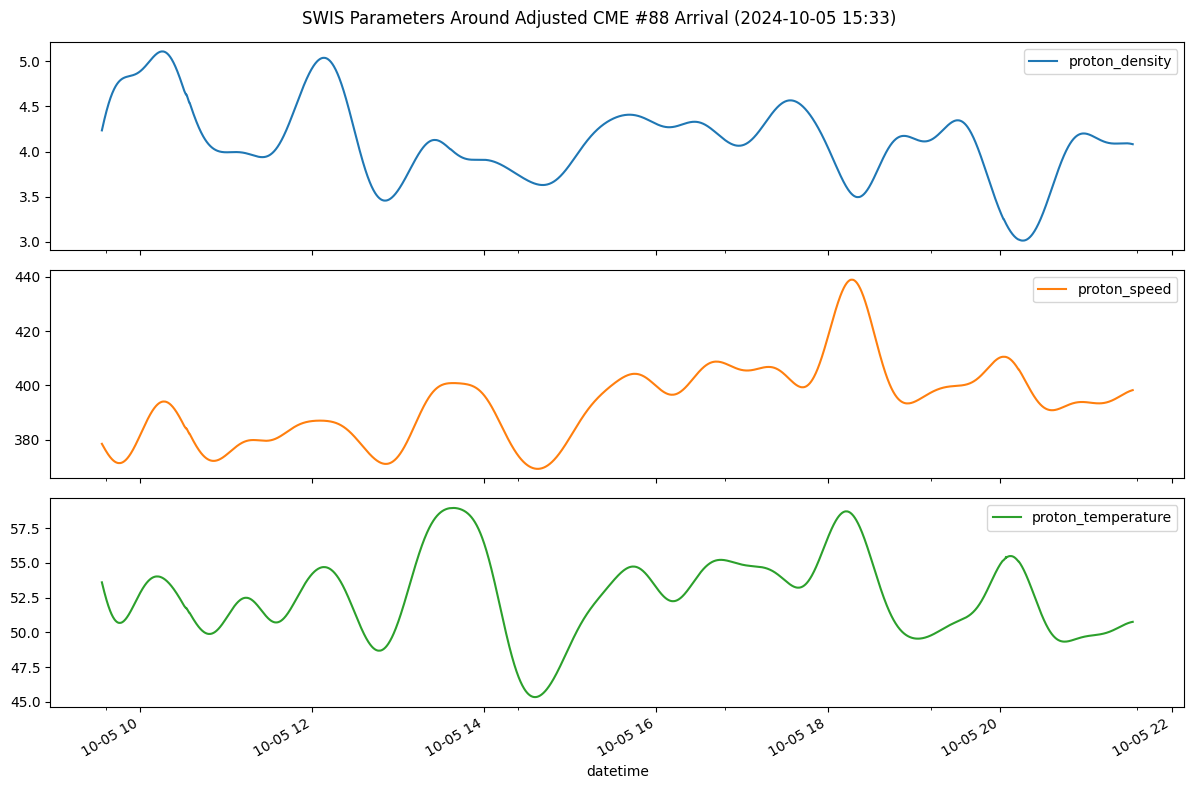

🛰️ Adjusted CME 89: 2024-10-09 15:17:18.924509 | Points: 2880


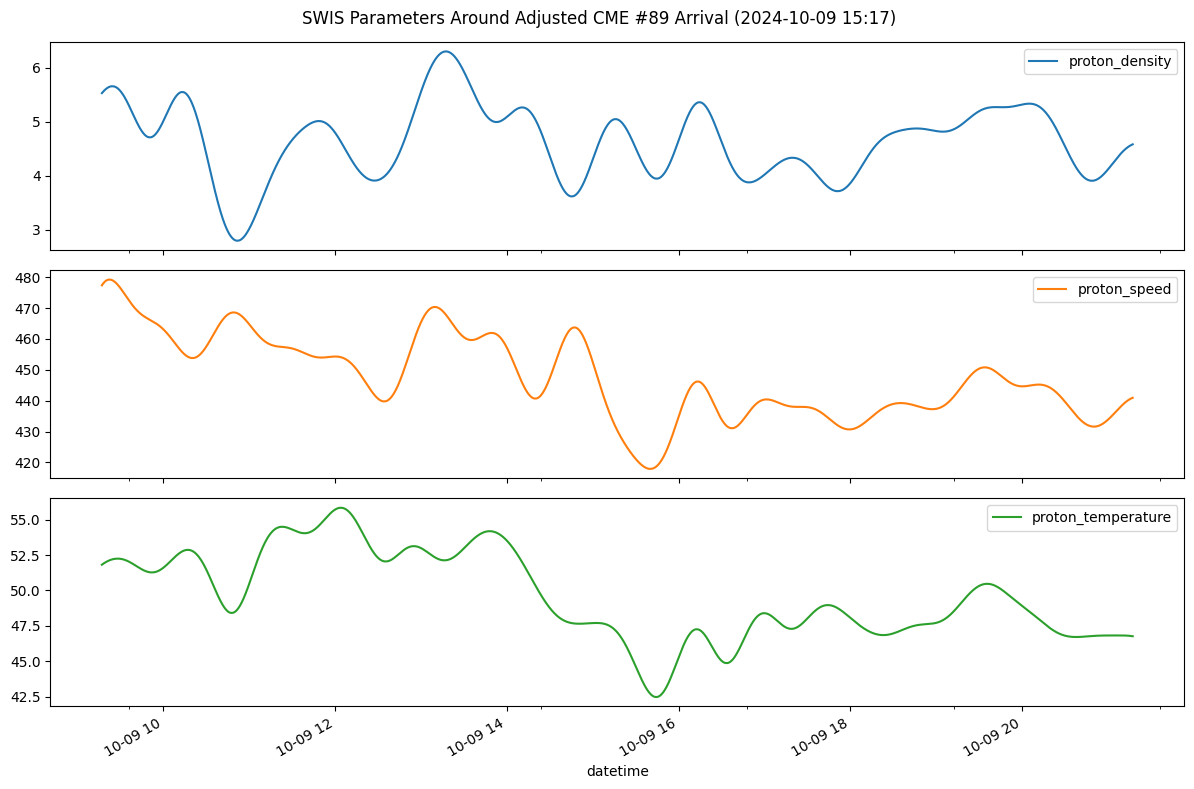

🛰️ Adjusted CME 90: 2024-10-10 07:14:09.616725 | Points: 2877


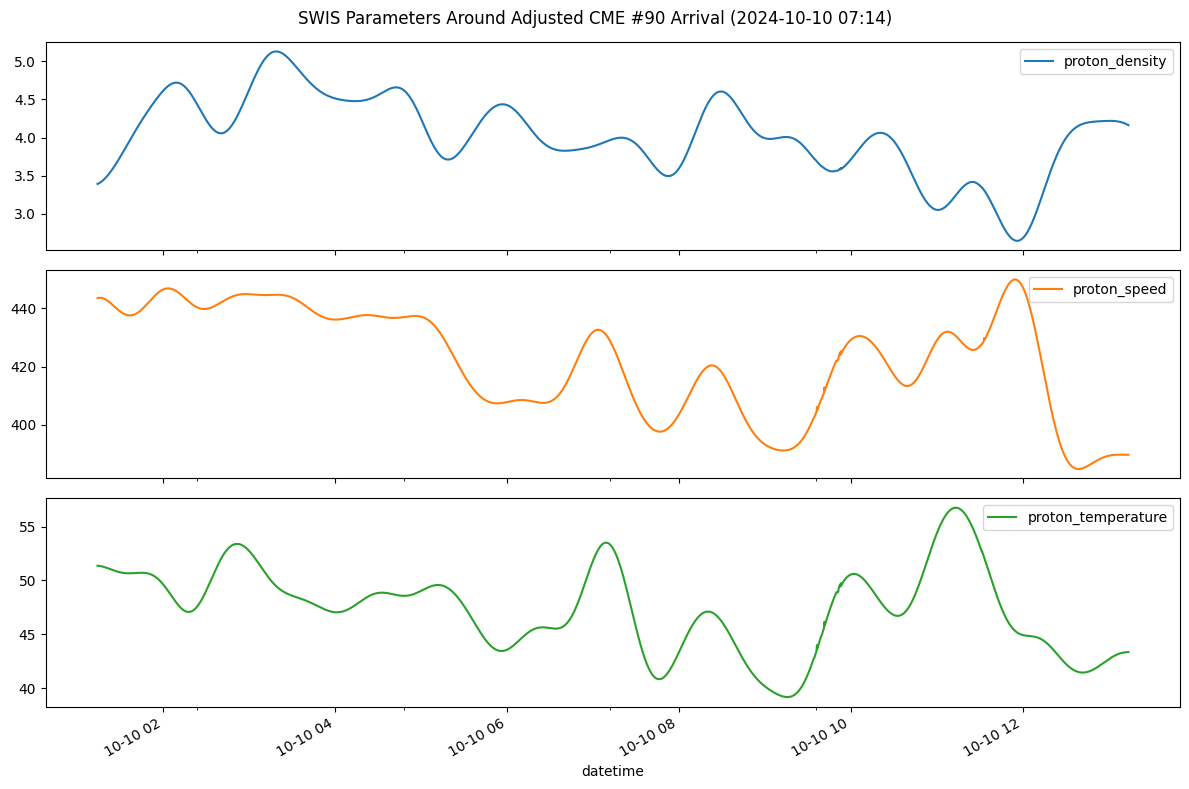

🛰️ Adjusted CME 91: 2024-10-19 08:09:02.320442 | Points: 2880


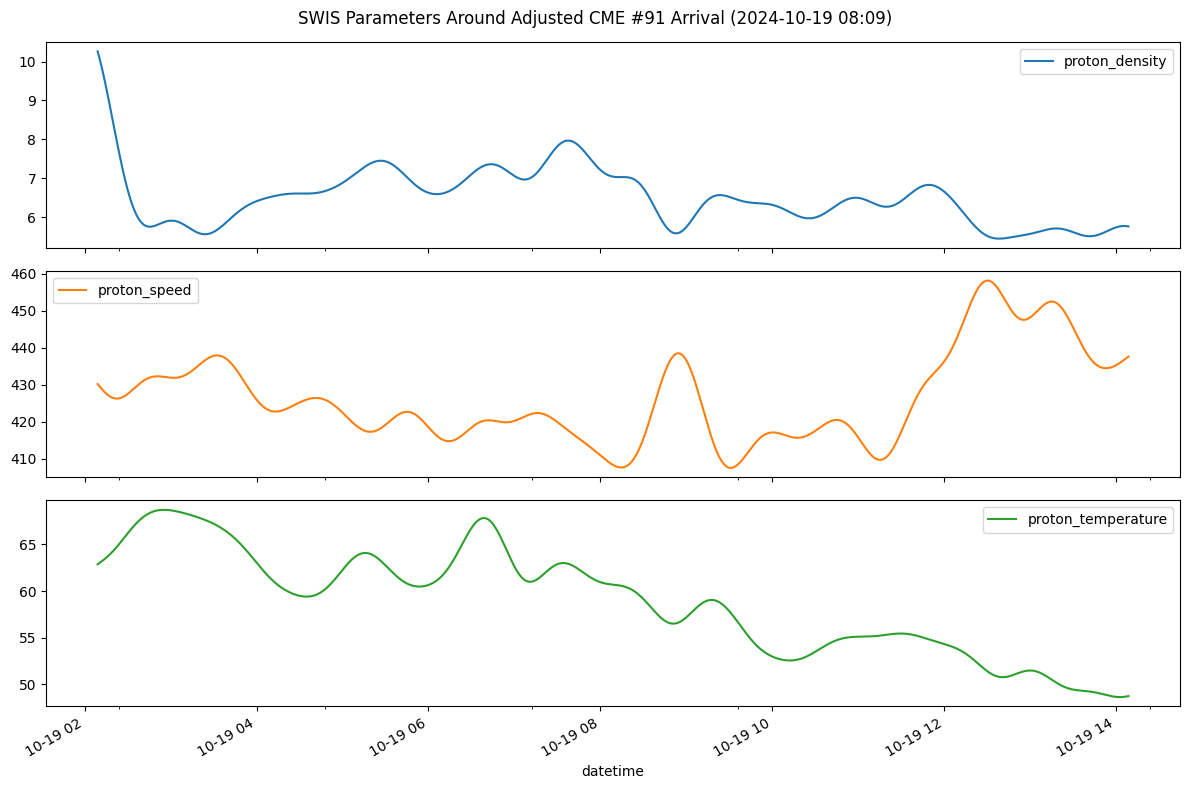

🛰️ Adjusted CME 92: 2024-10-24 21:16:13.081761 | Points: 2880


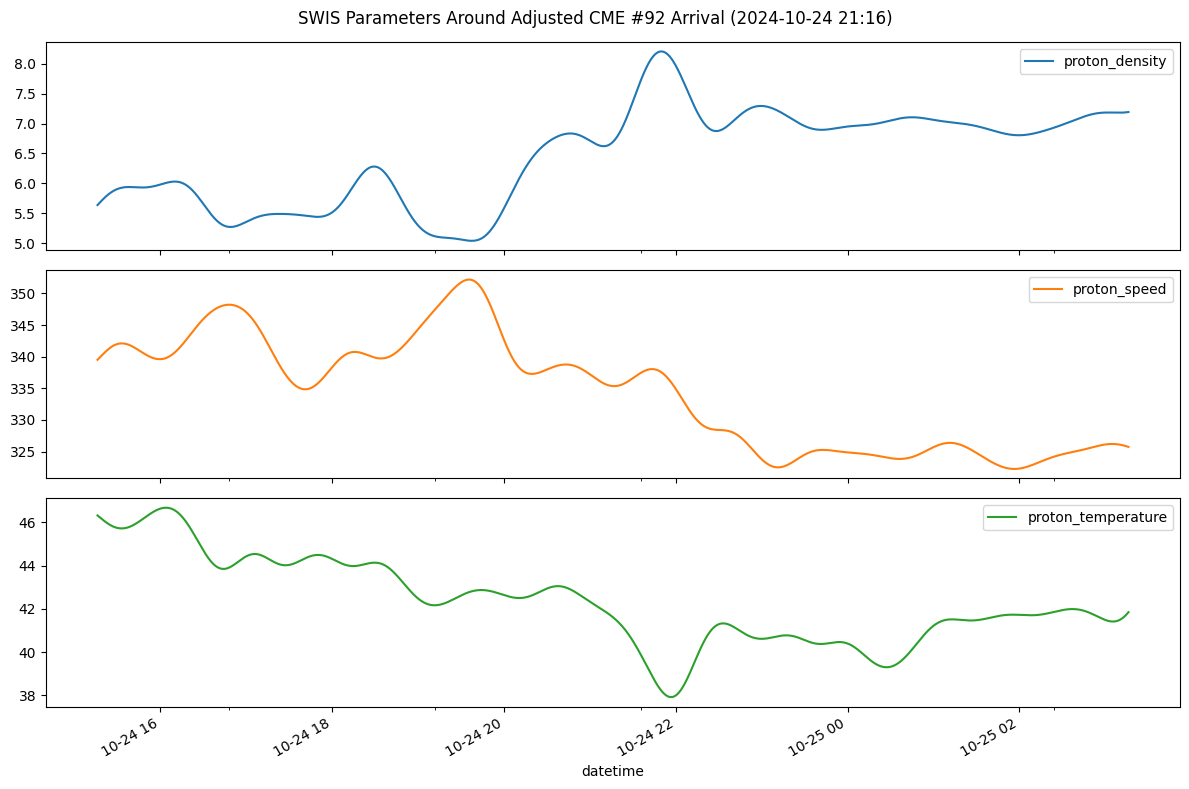

🛰️ Adjusted CME 93: 2024-10-27 04:22:09.905956 | Points: 2850


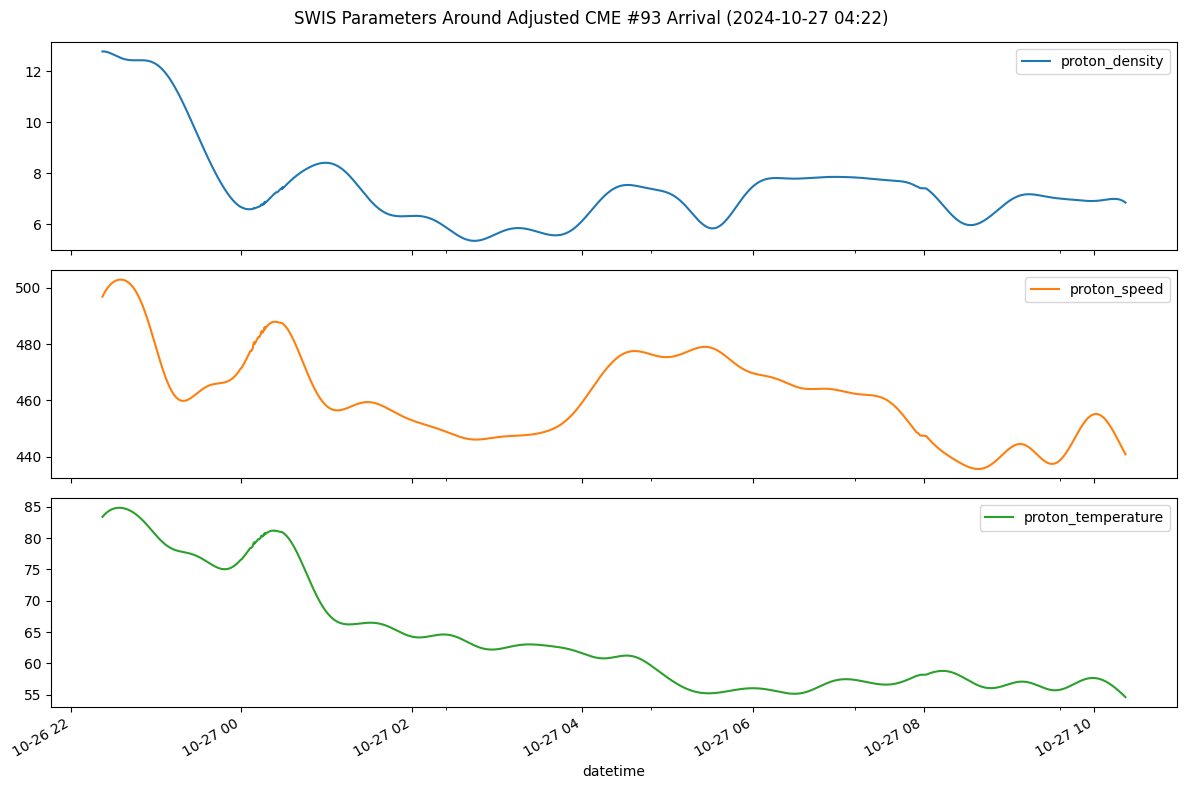

🛰️ Adjusted CME 94: 2024-11-05 21:00:13 | Points: 2159


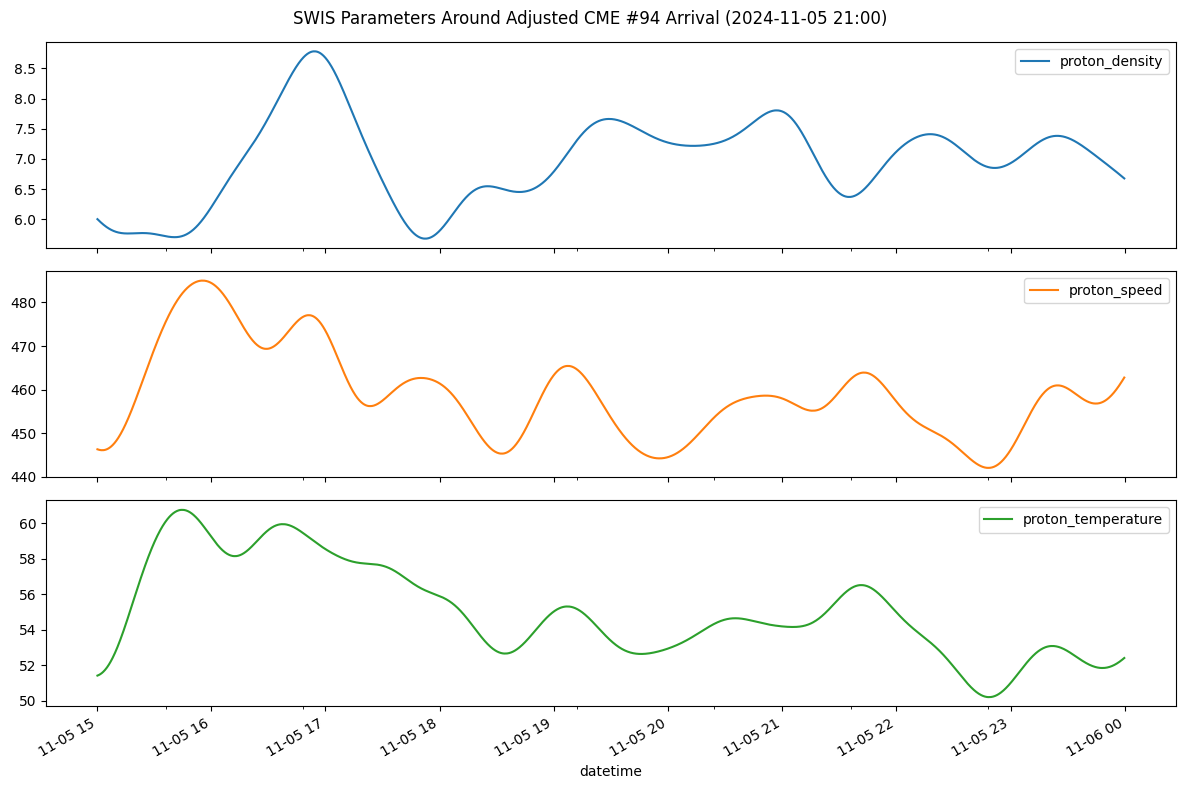

🛰️ Adjusted CME 95: 2024-11-13 08:24:45.714286 | Points: 2880


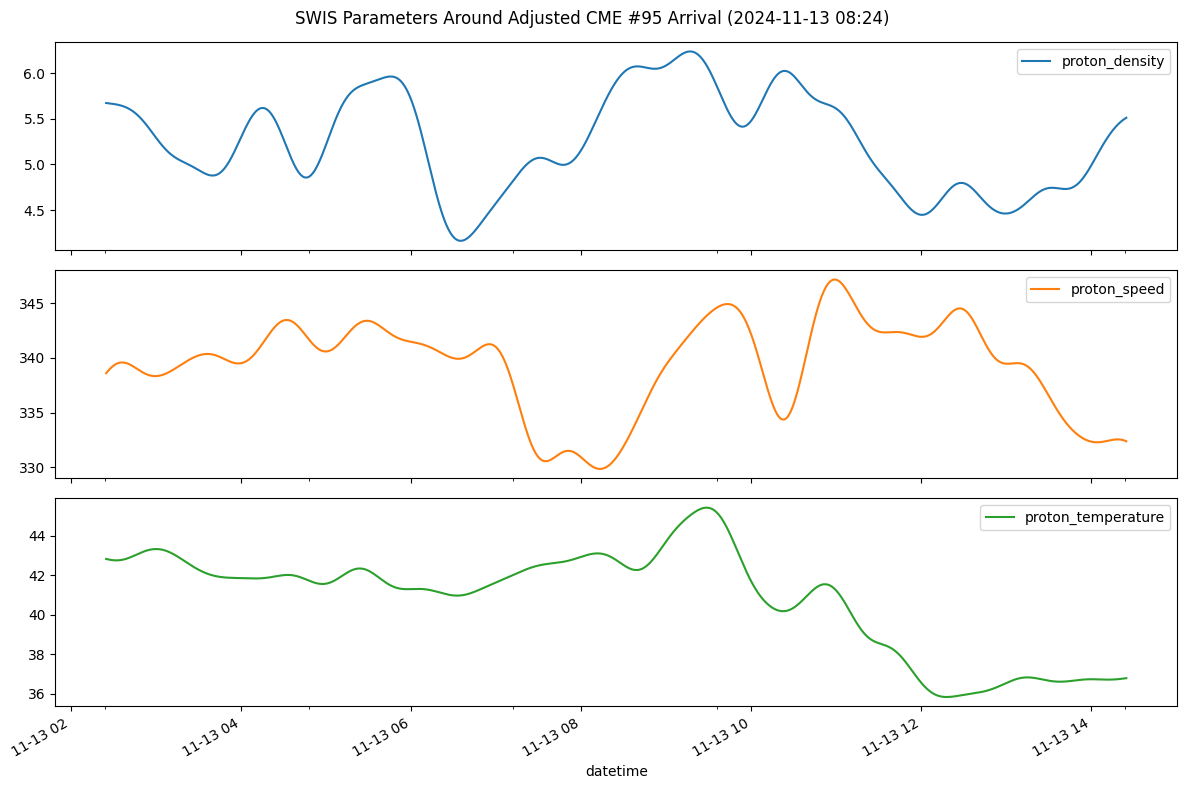

🛰️ Adjusted CME 96: 2024-11-22 23:12:56.824513 | Points: 2878


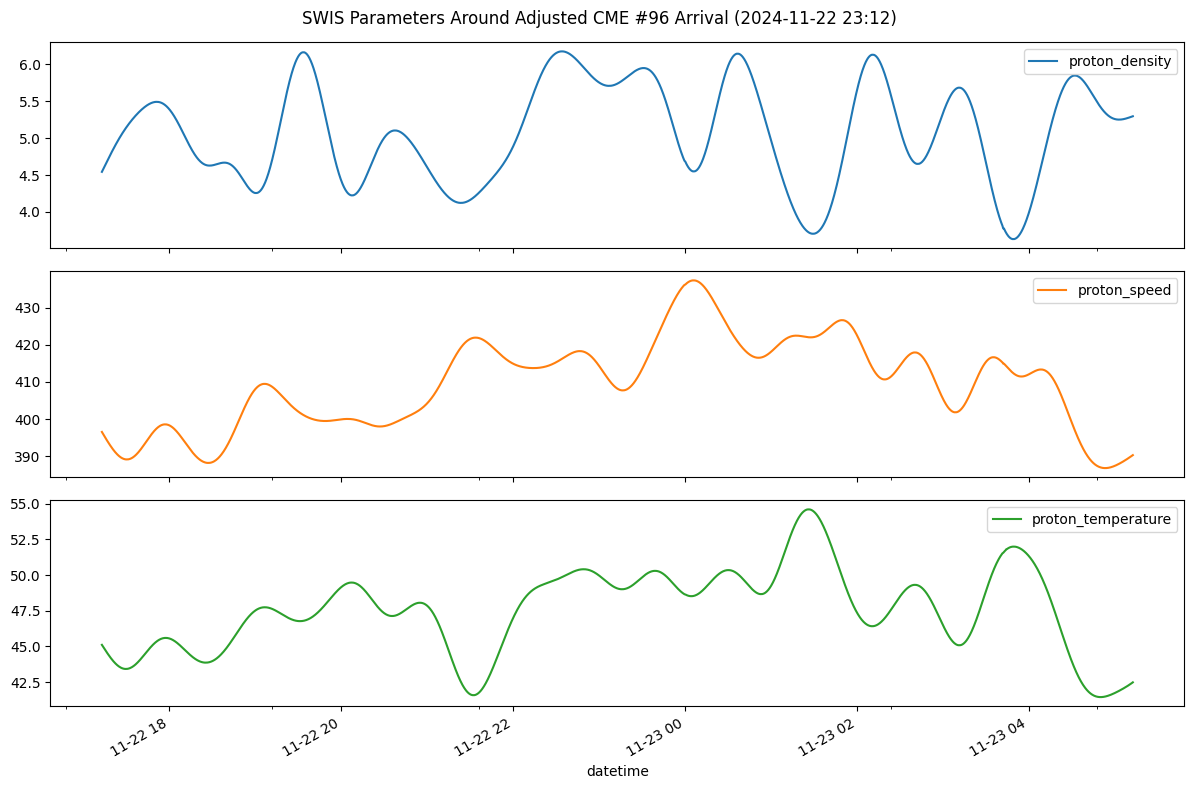

🛰️ Adjusted CME 97: 2024-12-15 20:19:45.753425 | Points: 2877


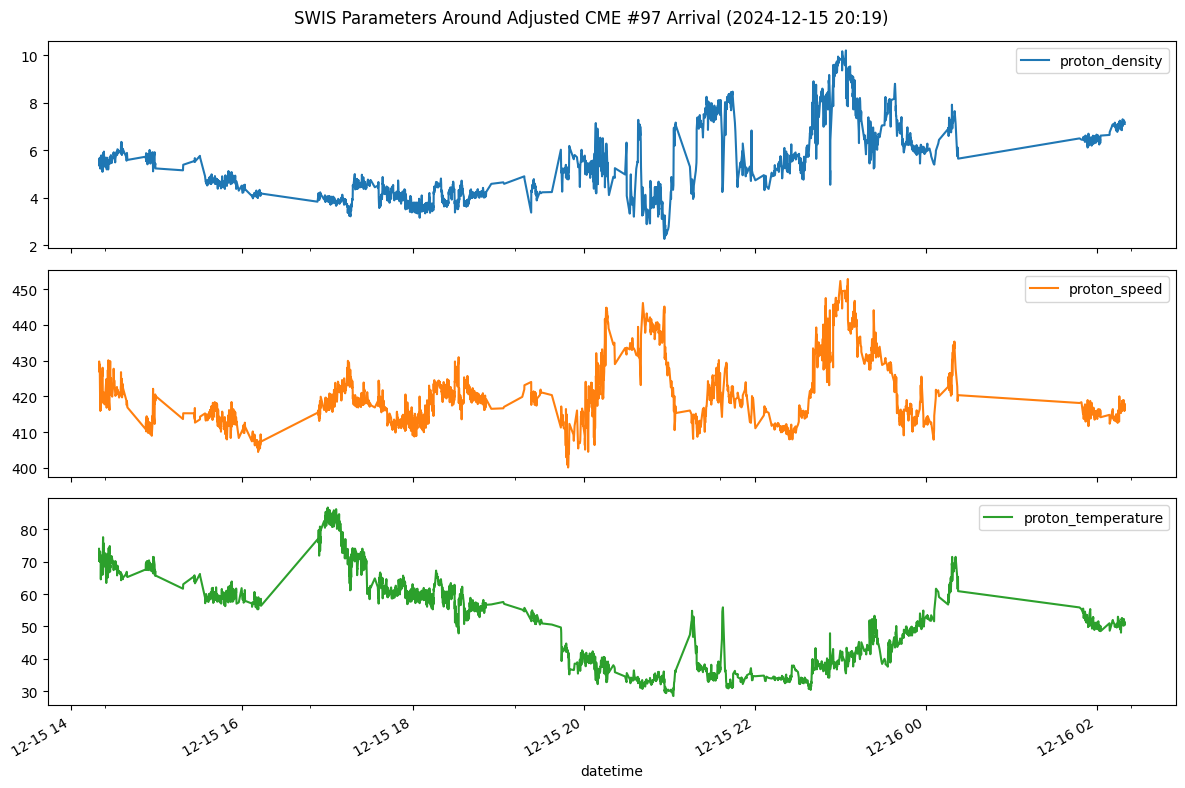

🛰️ Adjusted CME 98: 2024-12-17 12:56:52.057842 | Points: 2116


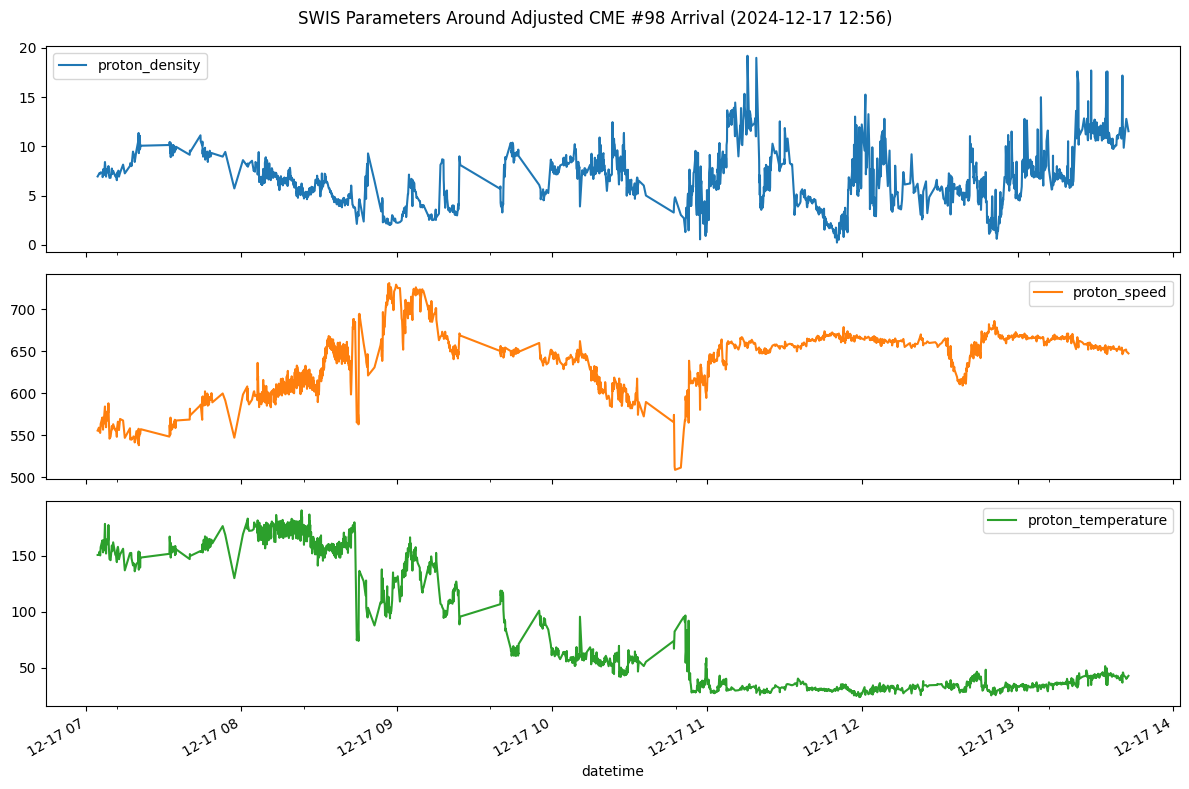

🛰️ Adjusted CME 99: 2024-12-18 15:19:46.562150 | Points: 251


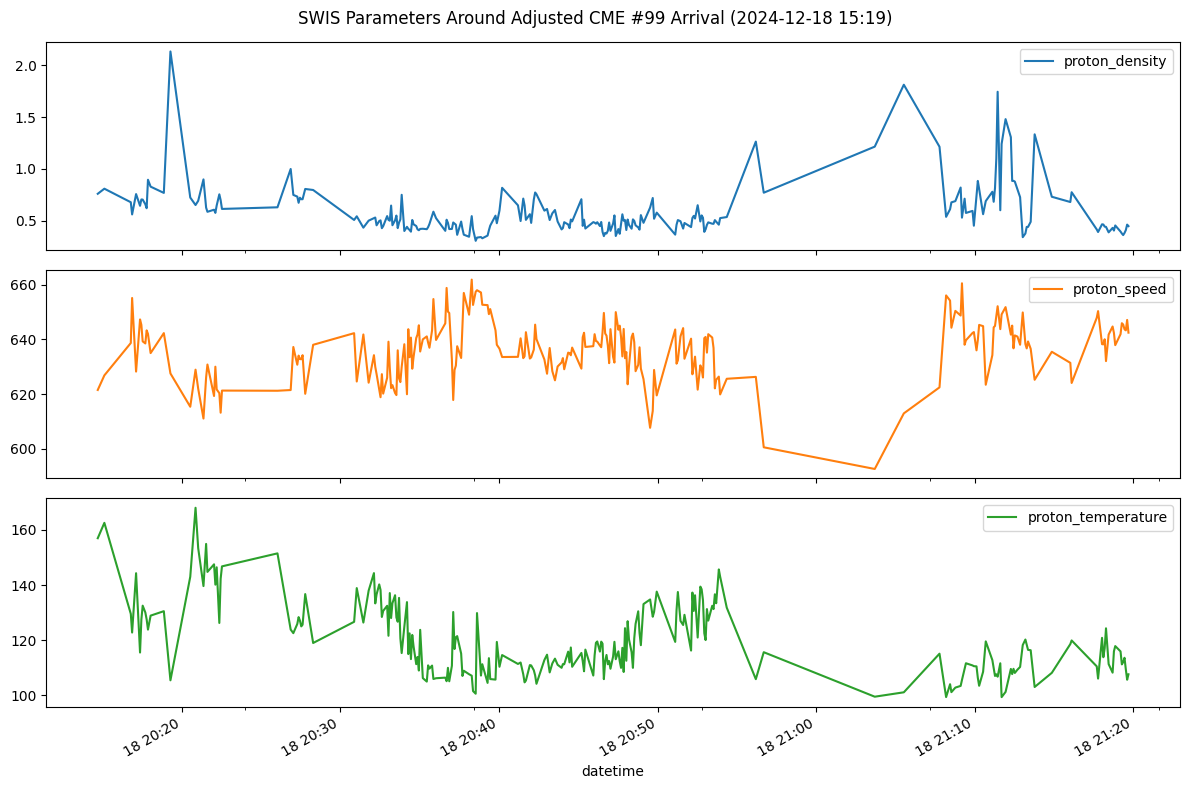

🛰️ Adjusted CME 100: 2024-12-21 08:55:11.567718 | Points: 3303


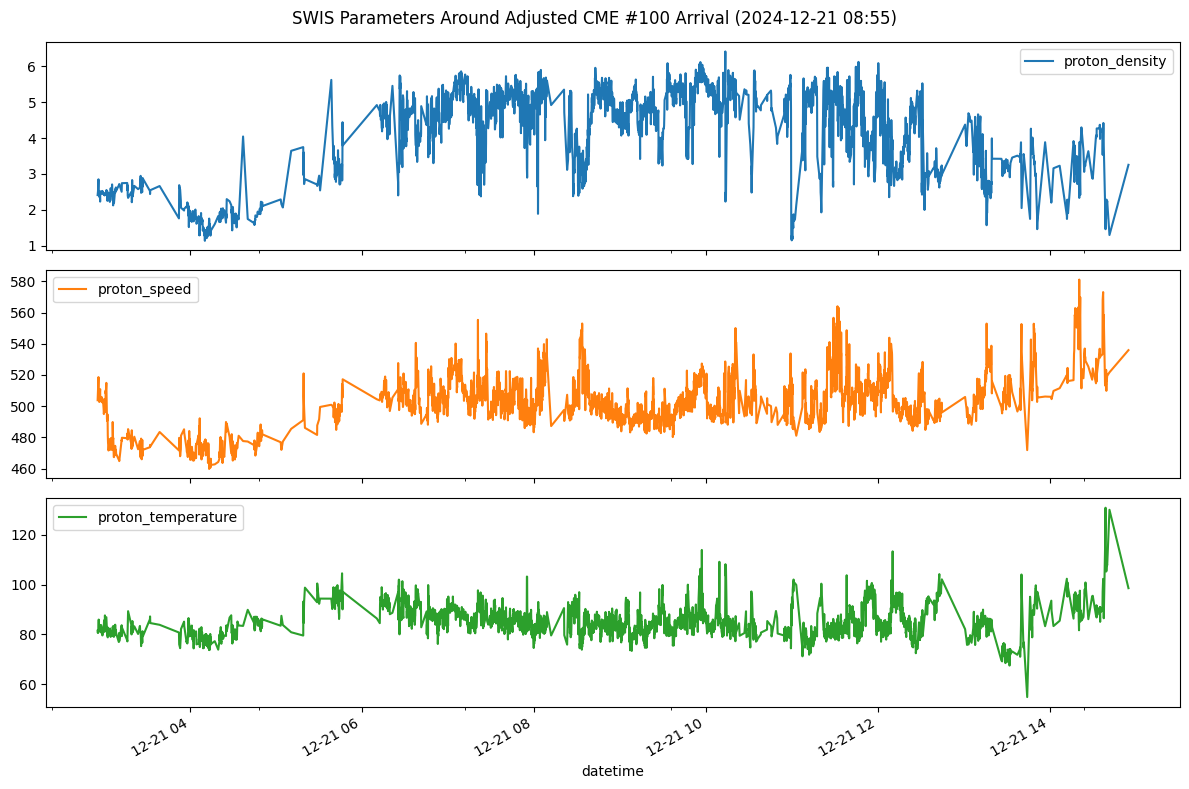

🛰️ Adjusted CME 101: 2024-12-25 23:57:43.255814 | Points: 6203


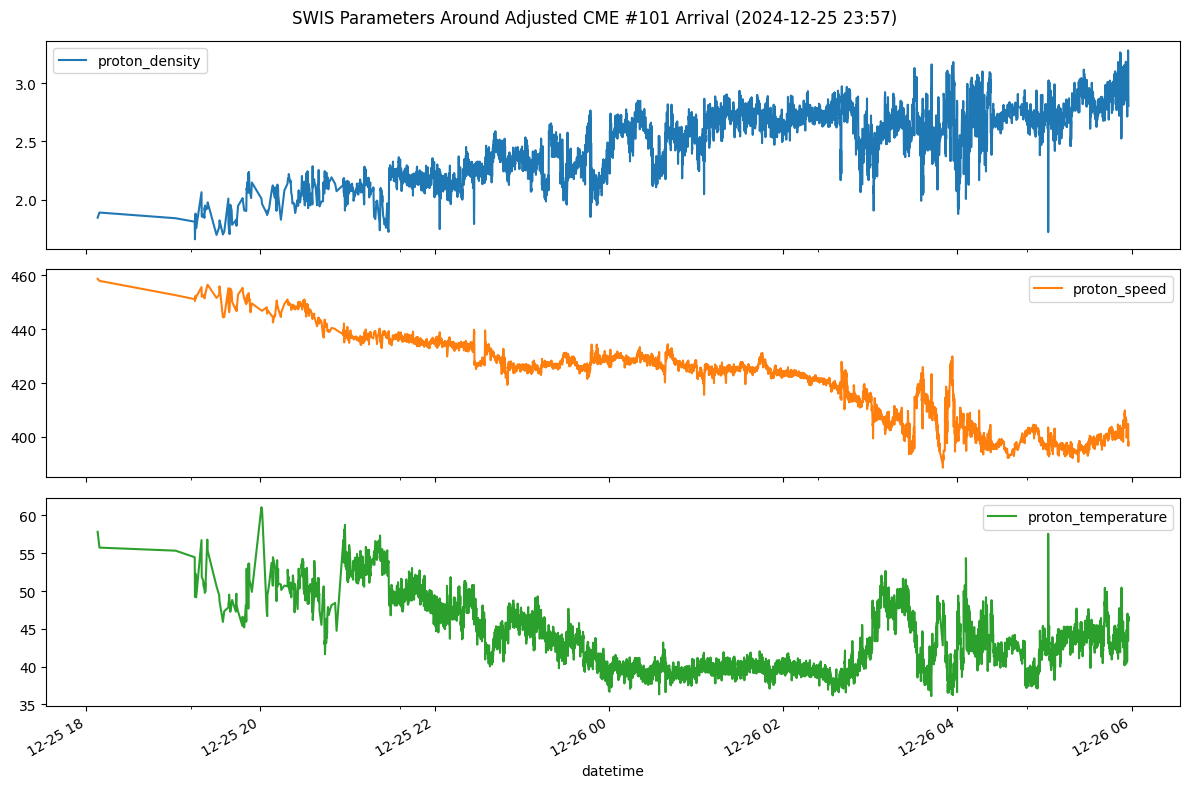

🛰️ Adjusted CME 102: 2024-12-31 12:44:15.078534 | Points: 6212


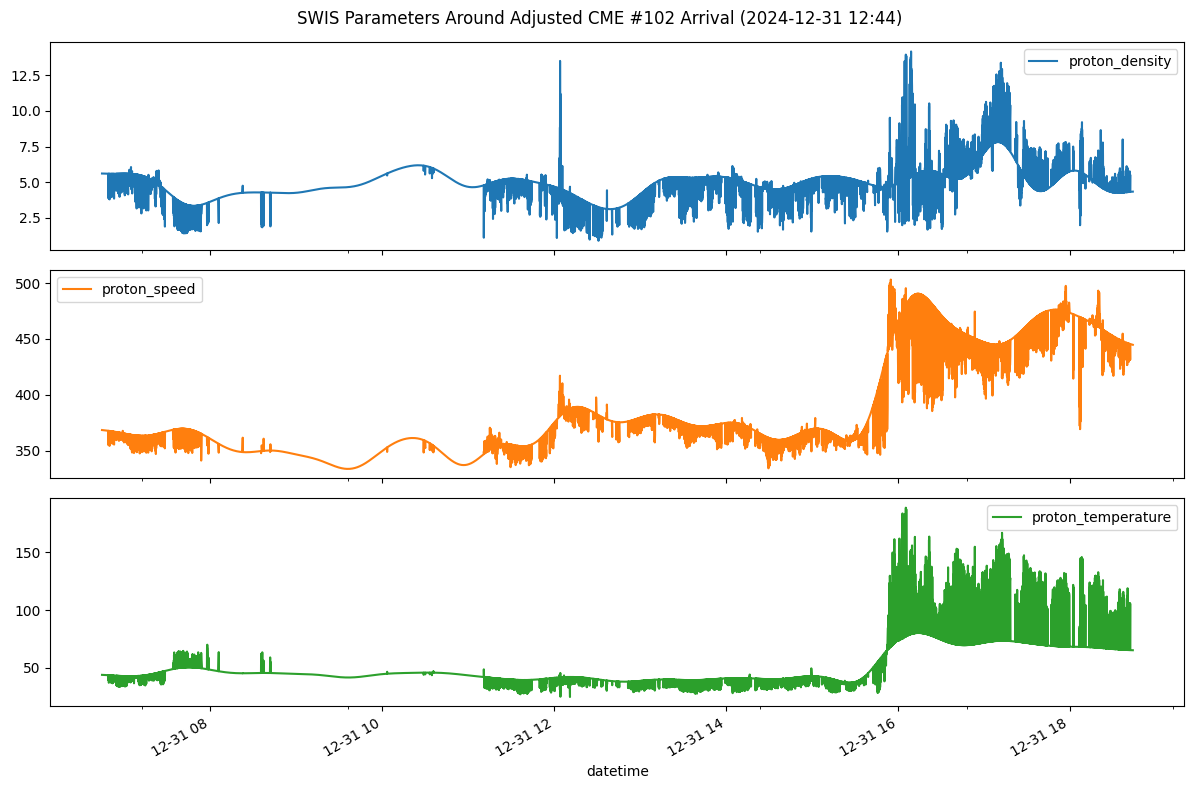

🛰️ Adjusted CME 103: 2025-01-26 14:22:14.536817 | Points: 5923


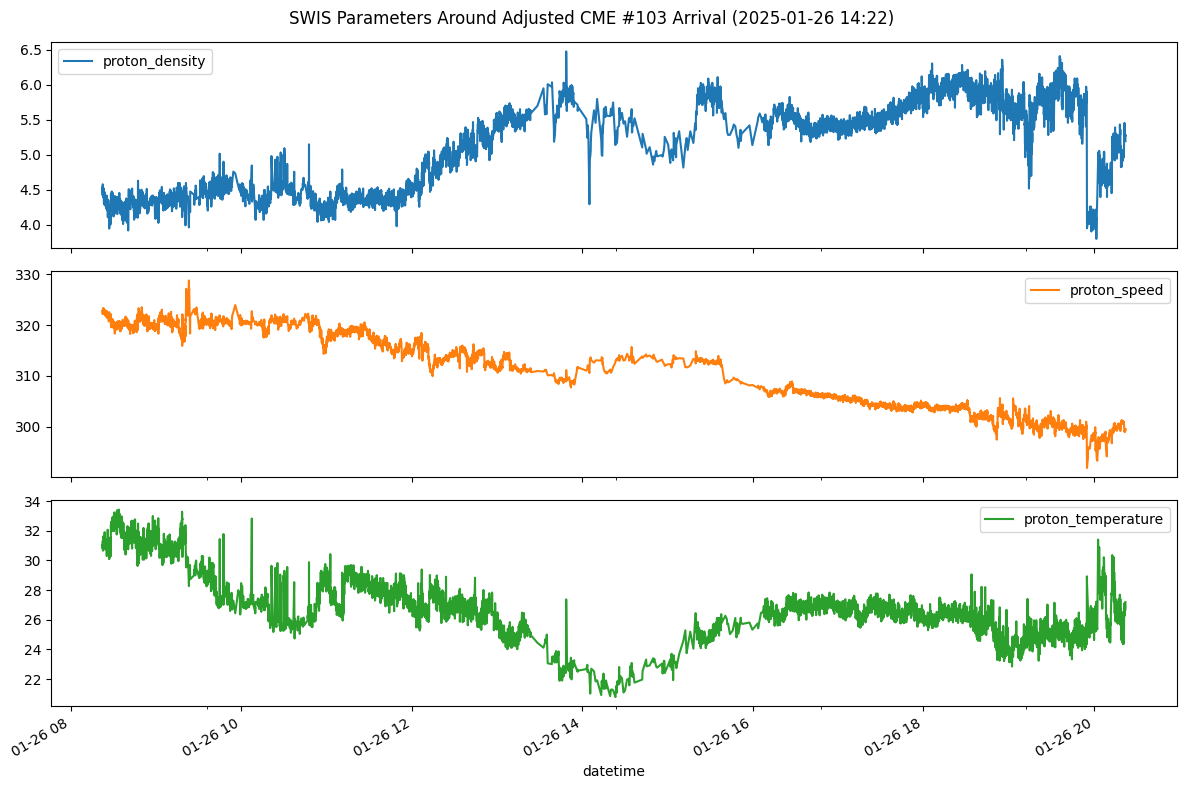

🛰️ Adjusted CME 104: 2025-01-26 18:23:42.454308 | Points: 5352


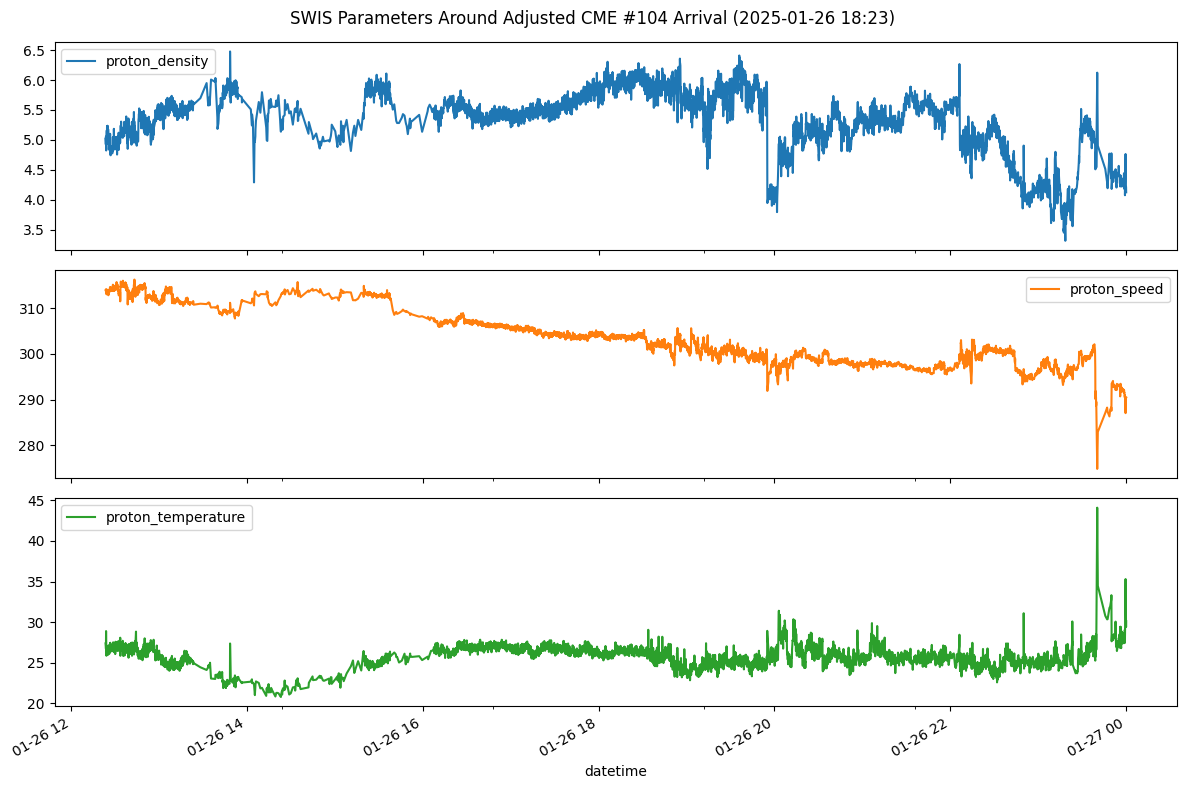

🛰️ Adjusted CME 105: 2025-02-03 18:15:13.595801 | Points: 2102


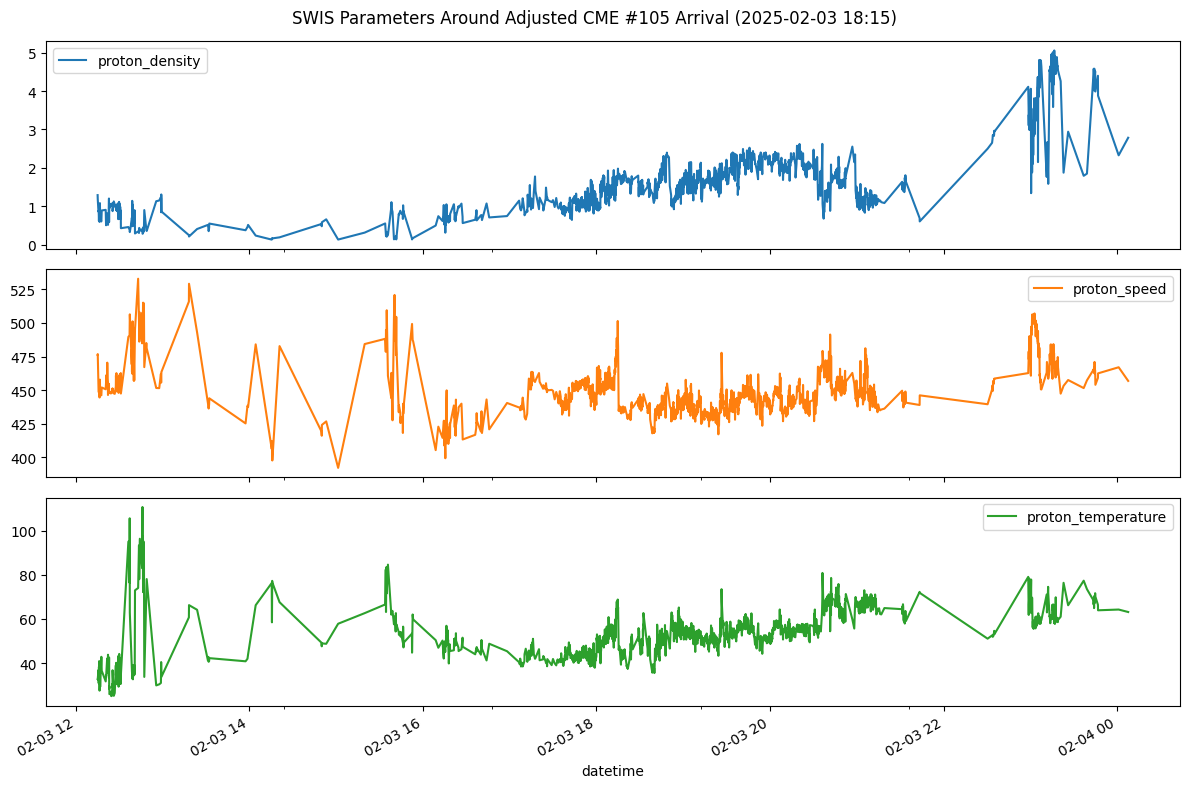

🛰️ Adjusted CME 106: 2025-02-05 12:37:10.502283 | Points: 5465


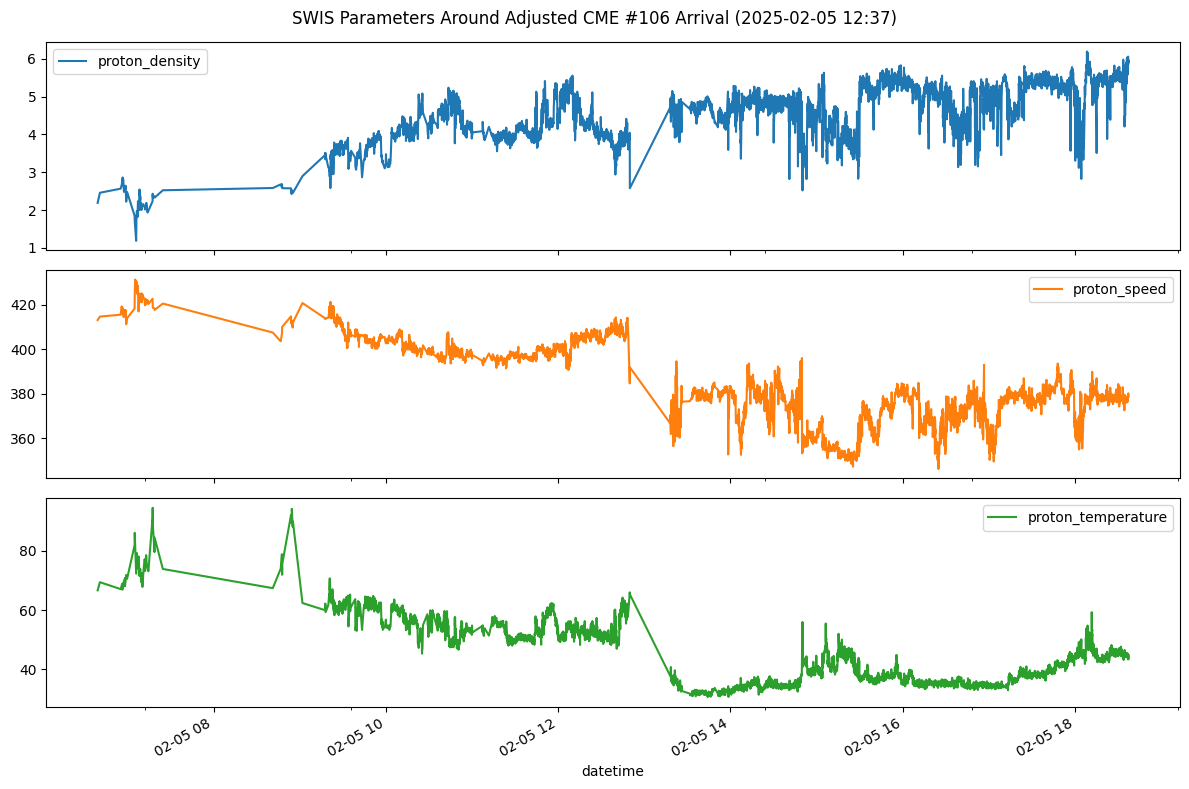

🛰️ Adjusted CME 107: 2025-02-26 12:34:56.937618 | Points: 1719


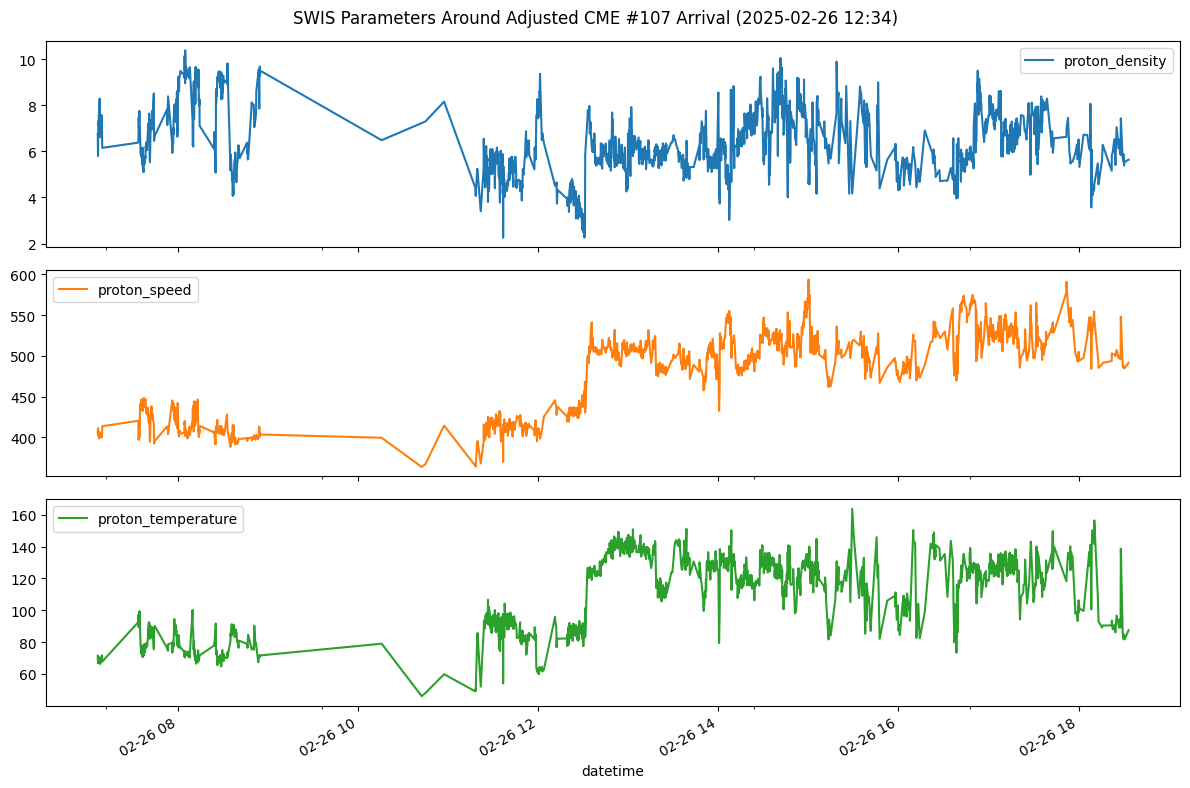

🛰️ Adjusted CME 108: 2025-03-02 11:44:39.024390 | Points: 6980


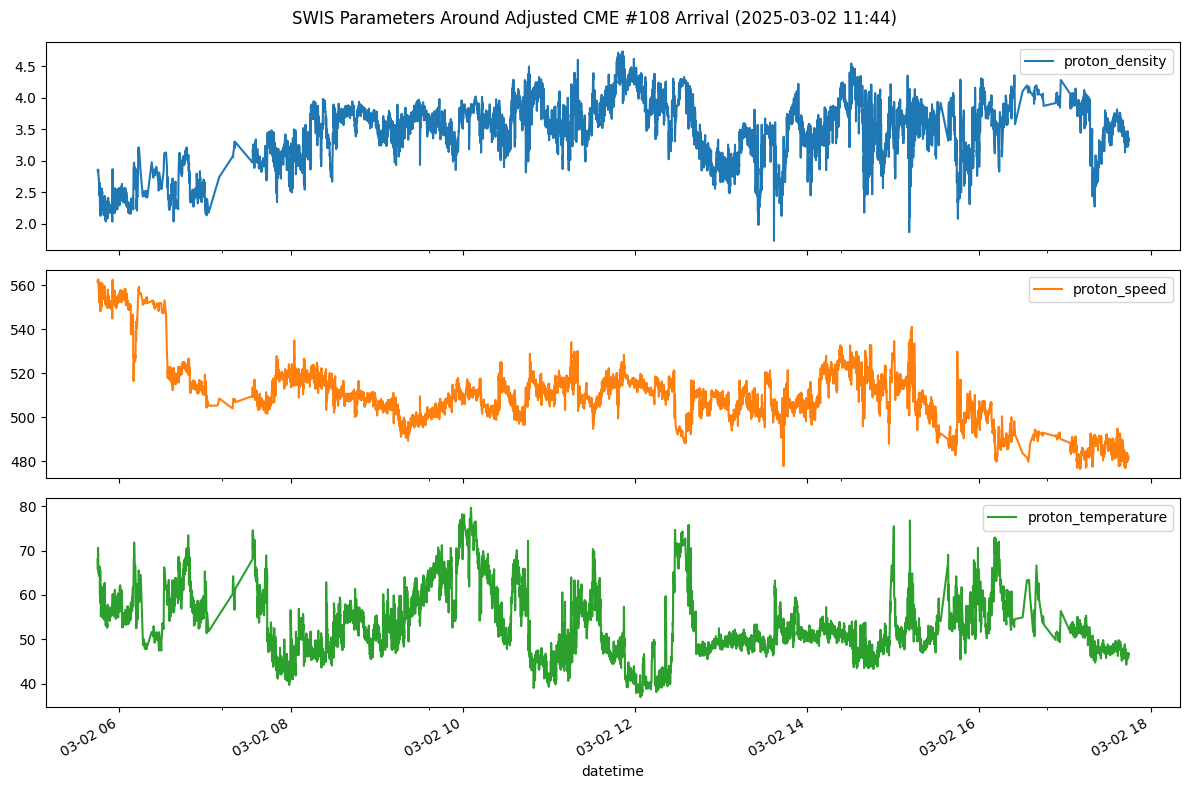

🛰️ Adjusted CME 109: 2025-03-23 18:52:30.183150 | Points: 1821


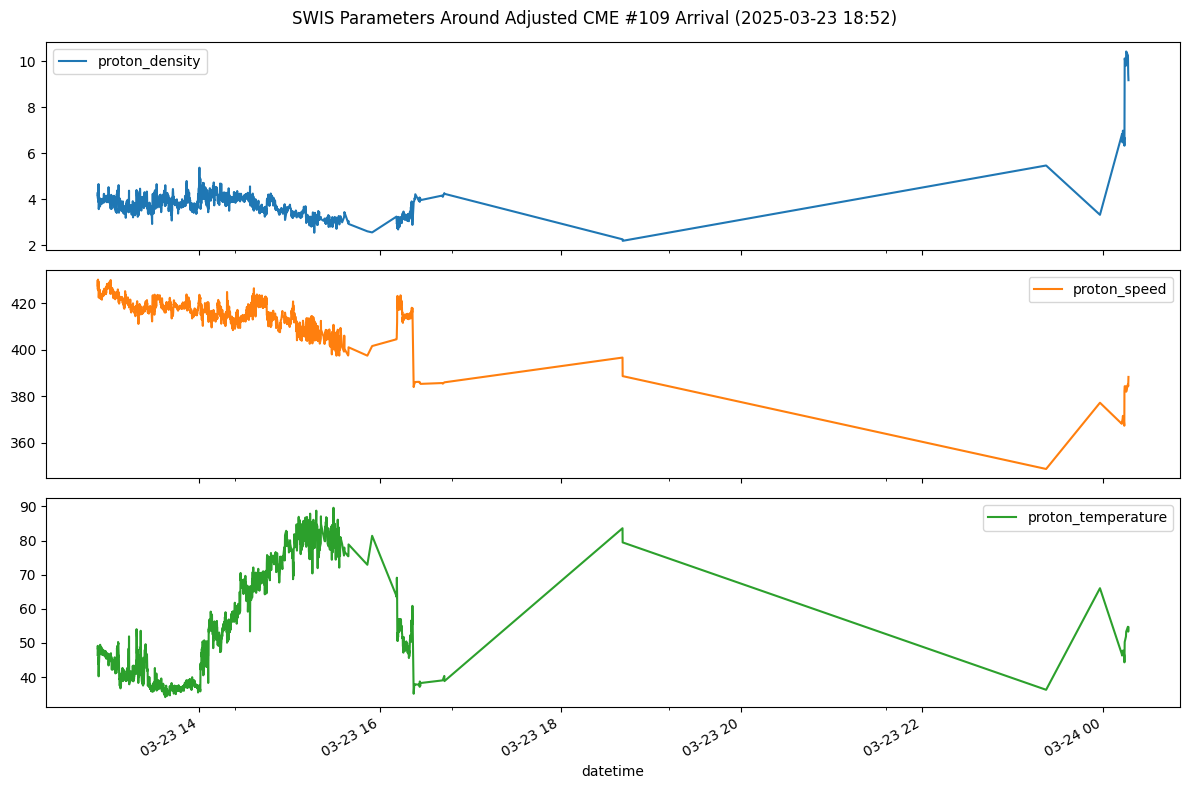

🛰️ Adjusted CME 110: 2025-03-29 12:22:48.700906 | Points: 4694


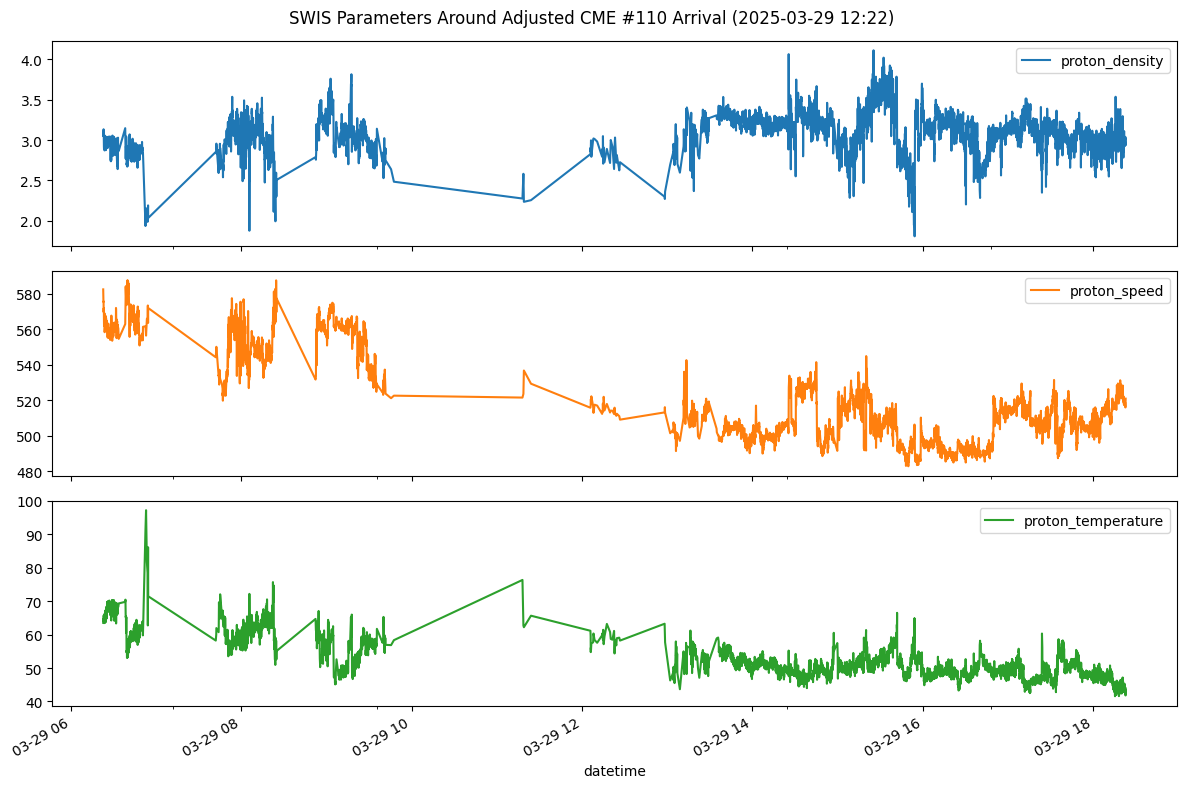

In [16]:
# How many adjusted events to visualize
num_to_plot = 110  # Increase this later if needed

for i, arrival_time in enumerate(adjusted_cme_arrivals[:num_to_plot]):
    start_time = arrival_time - timedelta(hours=6)
    end_time = arrival_time + timedelta(hours=6)

    window_df = df[(df.index >= start_time) & (df.index <= end_time)]

    if window_df.empty:
        print(f"⚠️ No SWIS data for adjusted CME {i+1} at {arrival_time}")
        continue

    print(f"🛰️ Adjusted CME {i+1}: {arrival_time} | Points: {len(window_df)}")

    # Plot
    window_df.plot(
        subplots=True,
        figsize=(12, 8),
        title=f"SWIS Parameters Around Adjusted CME #{i+1} Arrival ({arrival_time.strftime('%Y-%m-%d %H:%M')})",
        sharex=True
    )
    plt.tight_layout()
    plt.show()
